<h1>How to Create a Module - In this case Gtool </h1>

<h2>We will first create an empty module, but make it capable of being imported</h2>
<p>
  Print out your system paths to find a location to place your module. Pick one of the system paths 
  where you want to place your module. Create a directory there with the same name in the same case 
  as the module you wish to create. In this case my module ' Gtool ' short for ' Graphic Tool '
  In side of the newly created Gtool directory, create two empty files. 
  </p>
 <pre>
 &#95;&#95;ini&#95;&#95;.py  
 Gtool.py</pre>

<h3>At this point you have an importable 'empty' module</h3>

             
             

#List your system paths
import sys
print sys.path

##### pick one of the system paths to place your madule:
I have decided on /home/jack/anaconda2/pkgs as the location to place my module. 
I will then make a directory there called Gtool. I will use the ! to execute a bash command.  

#Create a directory there.
!mkdir /home/jack/anaconda2/pkgs/Gtool

#Create an empty __init__.py file
!touch /home/jack/anaconda2/pkgs/Gtool/__init__.py

#Then create your module file in the same directory ' Gtool.py ' it also may be empty to start. 
!touch /home/jack/anaconda2/pkgs/Gtool/Gtool.py

In [1]:
import Gtool
import cv2

Version2.4


#### Load the file for purpose of editing
####   %load /home/jack/anaconda2/pkgs/Gtool/Gtool.py
#### After editing you man use %%writefile to save it. Example:
####   %%writefile /home/jack/anaconda2/pkgs/Gtool/Gtool.py

In [1]:
#%%writefile /home/jack/anaconda2/pkgs/Gtool/Gtool.py
#!/usr/bin/python
import makesquare
import randsize
import randim
import datename
import blendoverlay

Overwriting /home/jack/anaconda2/pkgs/Gtool/Gtool.py


In [2]:
%%writefile /home/jack/anaconda2/pkgs/Gtool/makesquare.py
#!/usr/bin/python
import PIL
import time
from PIL import Image
import random, os
from random import randint
# make_square(imp_path = "images/", side=300) Picks a random image in a directory, squares it \
# reguardless of aspect. The default directory is images/ the default size is 300
# usage for default directory and size just use: make_square()
# For your own directory or size: make_square(imp_path = "My-directory/", side=500)
def make_square(imp_path = "images/", side=300):
    random_filename = random.choice([
        x for x in os.listdir(imp_path)
        if os.path.isfile(os.path.join(imp_path, x))
    ])
    img2 = imp_path+"/"+random_filename
    im2=Image.open(img2)
    img5 = im2.resize((side,side), PIL.Image.ANTIALIAS)
    return img5

Overwriting /home/jack/anaconda2/pkgs/Gtool/makesquare.py


In [8]:
#%%writefile /home/jack/anaconda2/pkgs/Gtool/randsize.py
#!/usr/bin/python
import PIL
import time
from PIL import Image
import random, os
from random import randint
# rand_size(imp_path='STUFF/new/', minS=150, maxS=300, output="STUFF/Temp.jpg")
# Picks a ranom image in a directory, and distorts it  
# Default path images/ default minimum width random(250-400), height random(250-400) intentionally\
# distorting the aspect.
def rand_size(imp_path='images/', minS=250, maxS=500, output="output/Temp.jpg"):
    path3 = imp_path
    random_filename3 = random.choice([
        x for x in os.listdir(path3)
        if os.path.isfile(os.path.join(path3, x))
    ])
    sidea=(randint(minS, maxS))
    
    sideb=(randint(minS, maxS))
    img1 = path3+"/"+random_filename3
    im1=Image.open(img1)
    img = im1.resize((sidea,sideb), PIL.Image.ANTIALIAS)
    img.save(output)
    return img

In [52]:
#%%writefile /home/jack/anaconda2/pkgs/Gtool/randim.py
#!/usr/bin/python
# randim(inpath = "images/") Finds random images in a directory 
#Default directory is: images/
import PIL
import time
from PIL import Image
import random, os
from random import randint
def rand_im(inpath = "images/"):
    random_filename2 = random.choice([
        x for x in os.listdir(inpath)
        if os.path.isfile(os.path.join(inpath, x))
    ])

    img1 = inpath+"/"+random_filename2
    im1=Image.open(img1)
    longer_side = max(im1.size)
    basewidth = longer_side
    img = Image.open(img1)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
    half_the_width = img.size[0] / 2
    half_the_height = img.size[1] / 2
    img4 = img.crop(
        (
            half_the_width - 320,
            half_the_height - 320,
            half_the_width + 320,
            half_the_height + 320
        )
    )
    return img4

In [43]:
!rm /home/jack/anaconda2/pkgs/Gtool/datename.*

In [46]:
!python /home/jack/anaconda2/pkgs/Gtool/datename.py

In [54]:
#%%writefile /home/jack/anaconda2/pkgs/Gtool/datename.py 
#!/usr/bin/python
#Automatically names a file with the current date, time and png extension
#You may add your own identity prefix. Each save is a new filename.
#Saves a file as a png with the date and time. Example: 20170621-151523.png
#usage:   img.save(datename())  or newim.save("mydirectory/"+datename.date_time()) 
#EXAMPLE:   image.save(FN)
#import Gtool
#from Gtool import datename
#datename.date_name()
#FN = "EXPERIMENT_"+datename.date_name()
#EXAMPLE:   image.save(FN) 
#Will create 'EXPERIMENT_20170623-090707.png'
import time
def date_name():
    timename = time.strftime("%Y%m%d-%H%M%S")
    filename = timename+".png"
    return filename

Overwriting /home/jack/anaconda2/pkgs/Gtool/datename.py


In [12]:
#%%writefile /home/jack/anaconda2/pkgs/Gtool/blendoverlay.py
#!/usr/bin/python
import PIL
import time
from PIL import Image
import random, os
from random import randint
import random, os
# Randomly choose two images. The default directories are images/. The images may be two 
# different directories.
def blend_overlay(Opath="images/", Bpath="images/"):
    #path = r"bugs/advertisements/"

    random_filename1 = random.choice([
        x for x in os.listdir(Opath)
        if os.path.isfile(os.path.join(Opath, x))
    ])
  
    img1 = Opath+random_filename1
    im1 = Image.open(img1)
    longer_side = max(im1.size)
    basewidth = 800
    img = Image.open(img1)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
    half_the_width = img.size[0] / 2
    half_the_height = img.size[1] / 2
    im = img.crop(
        (
            half_the_width - 320,
            half_the_height - 320,
            half_the_width + 320,
            half_the_height + 320
        )
    ) 
    
    im.save("output/"+"TEMP-img4.png") 
    #path2 = r"bugs/butterflies/"
    #path2 = r"bugs/advertisements1800/"
    random_filename2 = random.choice([
        y for y in os.listdir(Bpath)
        if os.path.isfile(os.path.join(Bpath, y))
    ])

    img1a = Bpath+"/"+random_filename2
    im1a=Image.open(img1a)
    basewidth = 640
    imga = Image.open(img1a)
    wpercent = (basewidth / float(imga.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    imga = imga.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
    half_the_width = imga.size[0] / 2
    half_the_height = imga.size[1] / 2
    img4a = imga.crop(
        (
            half_the_width - 320,
            half_the_height - 320,
            half_the_width + 320,
            half_the_height + 320
        )
    )
    img4a.save("output/"+"TEMP-img4a.png")

    
    background = Image.open("output/"+"TEMP-img4.png").convert("RGBA")
    overlay = Image.open("output/"+"TEMP-img4a.png").convert("RGBA")
 
    background = background.resize((640, 640), PIL.Image.ANTIALIAS)
    overlay = overlay.resize((640, 640), PIL.Image.ANTIALIAS)


    Alpha=(randint(1, 9))*0.1
    new_img = Image.blend(background, overlay, 0.4)

    
    return new_img

In [1]:
!ls /home/jack/anaconda2/pkgs/Gtool/

backgroundmake.py  Gtool.py	    makesquare.pyc  rmblack.py
bak-Gtool.py	   Gtool.pyc	    overlayprep.py  rmblack.pyc
batchprocess.py    imageplacera.py  randim.py	    test_my_script.py
blendoverlay.py    imageplacer.py   randim.pyc	    test_my_script.pyc
blendoverlay.pyc   __init__.py	    randsize.py
datename.py	   __init__.pyc     randsize.pyc
datename.pyc	   makesquare.py    rmblack


In [2]:
import Gtool
help(Gtool)

Version2.4
Help on package Gtool:

NAME
    Gtool

FILE
    /home/jack/anaconda2/pkgs/Gtool/__init__.py

PACKAGE CONTENTS
    Gtool
    backgroundmake
    bak-Gtool
    batchprocess
    blendoverlay
    datename
    imageplacer
    imageplacera
    makesquare
    overlayprep
    randim
    randsize
    rmblack
    test_my_script




#     datename.py     ----- START -----

In [6]:
#Automatically names a file with the current date, time and png extension
import Gtool
from Gtool import datename

datename.date_name()

'20170624-081926.png'

In [7]:
#Automatically names a file with the current date, time and png extension
#You may add your own identity prefix. Each save is a new filename.
# EXAMPLE:   image.save(FN)
import Gtool
from Gtool import datename

datename.date_name()
FN = "EXPERIMENT_"+datename.date_name()
# EXAMPLE:   image.save(FN) 
#will create 'EXPERIMENT_20170623-090707.png'
FN

'EXPERIMENT_20170624-081933.png'

In [47]:
import Gtool
from Gtool import datename
help(datename)

Help on module Gtool.datename in Gtool:

NAME
    Gtool.datename

FILE
    /home/jack/anaconda2/pkgs/Gtool/datename.py

DESCRIPTION
    # Saves a file as a png with the date and time. Example: 20170621-151523.png
    # usage:   img.save(datename())  or newim.save("mydirectory/"+datename())

FUNCTIONS
    date_name()




#     datename.py     ----- END -----

In [18]:
import Gtool
from Gtool import blendoverlay
help(blendoverlay)

Help on module Gtool.blendoverlay in Gtool:

NAME
    Gtool.blendoverlay

FILE
    /home/jack/anaconda2/pkgs/Gtool/blendoverlay.py

FUNCTIONS
    blend_overlay(Opath='images/', Bpath='images/')
        # Randomly choose two images. The default directories are images/. The images may be two 
        # different directories.




In [17]:
!mkdir output

mkdir: cannot create directory ‘output’: File exists


#     randim.py     ----- START ------

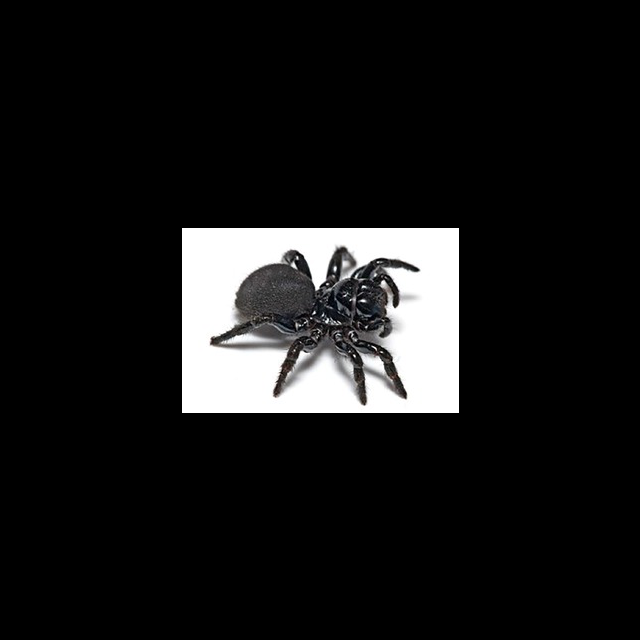

In [20]:
# GREAT DO NOT TOUCH
from PIL import Image
from Gtool import randim
from Gtool import datename
#make_square(imp_path='images/', side=300)
newim3 = randim.rand_im("bugs/spiders/")
newim3.save(datename.date_name())
newim3

In [11]:
import Gtool
from Gtool import randim
help(Gtool.randim)

Help on module Immanip.randim in Immanip:

NAME
    Immanip.randim

FILE
    /home/jack/anaconda2/pkgs/Immanip/randim.py

DESCRIPTION
    # randim(inpath = "images/") Finds random images in a directory 
    #Default directory is: images/

FUNCTIONS
    rand_im(inpath='images/')




#     randim.py ----- END ------

#     makesquare.py ----- START ------

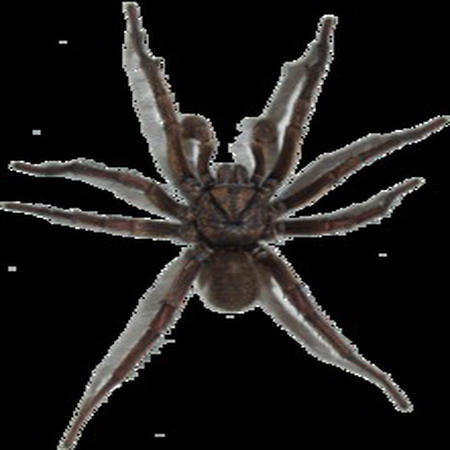

In [21]:
from PIL import Image
import Gtool
from Gtool import makesquare
from Gtool import datename
#make_square(imp_path='images/', side=300)
newim = makesquare.make_square("bugs/spiders/", 450)
newim.save(datename.date_name())
newim

In [9]:
import Gtool
from Gtool import makesquare
help(Gtool.makesquare)

Help on module Immanip.makesquare in Immanip:

NAME
    Immanip.makesquare

FILE
    /home/jack/anaconda2/pkgs/Immanip/makesquare.py

FUNCTIONS
    make_square(imp_path='images/', side=300)
        # make_square(imp_path = "images/", side=300) Picks a ranom image in a directory, squares it \
        # reguardless of aspect. The default directory is images/ the default size is 300
        # usage for default directory and size just use: make_square()
        # For your own directory or size: make_square(imp_path = "My-directory/", side=500)




#     makesquare.py ----- END ------

#     randsize.py     ----- START ----- 

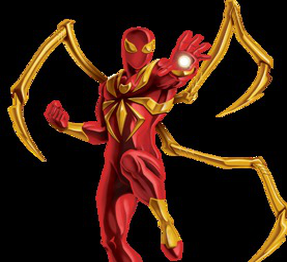

In [19]:
# GREAT DO NOT TOUCH
from PIL import Image
import Gtool
from Gtool import randsize
#make_square(imp_path='images/', side=300)
newim1 = randsize.rand_size("bugs/spiders/")
newim1.save("randsize_XXX.png")
newim1

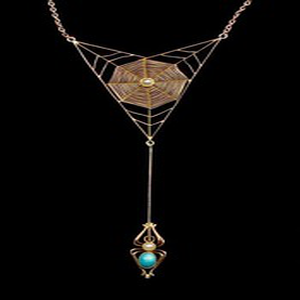

In [22]:
# GREAT DO NOT TOUCH
from PIL import Image
import Gtool
from Gtool import *
#make_square(imp_path='images/', side=300)
newim = makesquare.make_square("bugs/spiders/")
newim.save(datename.date_name())
newim

In [10]:
import Gtool
from Gtool import makesquare
help(Gtool.makesquare)

Help on module Immanip.makesquare in Immanip:

NAME
    Immanip.makesquare

FILE
    /home/jack/anaconda2/pkgs/Immanip/makesquare.py

FUNCTIONS
    make_square(imp_path='images/', side=300)
        # make_square(imp_path = "images/", side=300) Picks a ranom image in a directory, squares it \
        # reguardless of aspect. The default directory is images/ the default size is 300
        # usage for default directory and size just use: make_square()
        # For your own directory or size: make_square(imp_path = "My-directory/", side=500)




In [69]:
import Gtool
from Gtool import rmblack
help(Gtool.rmblack)

Help on module Immanip.rmblack in Immanip:

NAME
    Immanip.rmblack - # Works Great makes black transparent

FILE
    /home/jack/anaconda2/pkgs/Immanip/rmblack.py

FUNCTIONS
    rm_black(image_in='T-20170621-152227.png', image_out='NB-T-20170621-152227.png')




In [71]:
import Gtool
from Gtool import rmblack
rmblack.rm_black(image_in='20170621-153613.png', image_out='MODULE_TEST0007.png')

'MODULE_TEST0007.png'

In [12]:
from Gtool import datename

In [68]:
#%%writefile /home/jack/anaconda2/pkgs/Gtool/rmblack.py
#!/usr/bin/python
# Works Great makes black transparent

def rm_black(image_in ="T-20170621-152227.png", image_out = "NB-T-20170621-152227.png"):
    import cv2 
    src = cv2.imread(image_in, 1)
    tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    _,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
    b, g, r = cv2.split(src)
    rgba = [b,g,r, alpha]
    dst = cv2.merge(rgba,4)
    cv2.imwrite(image_out, dst)
    return image_out

# END ---------------------------------

# GOOD but not a module 

In [66]:
#%%writefile rmblack.py
#!/usr/bin/python
# Works Great makes black transparent
import cv2 
image_in ="T-20170621-152227.png"
image_out = "NB-T-20170621-152227.png"
 
src = cv2.imread(image_in, 1)
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(src)
rgba = [b,g,r, alpha]
dst = cv2.merge(rgba,4)
cv2.imwrite(image_out, dst)

True

In [83]:
import pygame
img = pygame.image.load('T-20170621-152227.png')
width = img.get_width()
height = img.get_height()
print (width, height)

640 640


In [78]:
from PIL import Image
with Image.open('T-20170621-152227.png') as img:
    width, height = img.size
    print (width, height)

640 640


In [80]:
import scipy.ndimage
height, width, channels = scipy.ndimage.imread('T-20170621-152227.png').shape
print (width, height)

640 640


In [ ]:
import Image

def crop_image(input_image, output_image, start_x, start_y, width, height):
    """Pass input name image, output name image, x coordinate to start croping, y coordinate to start croping, width to crop, height to crop """
    input_img = Image.open(input_image)
    box = (start_x, start_y, start_x + width, start_y + height)
    output_img = input_img.crop(box)
    output_img.save(output_image +".png")

def main():
    crop_image("T-20170621-152227.png","output-T-20170621-152227.png", 0, 0, 1280, 399)

if __name__ == '__main__': main()

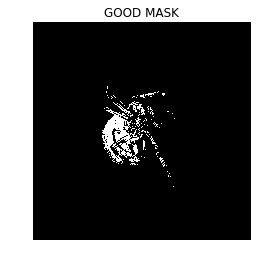

In [75]:
# GOOD MASK
import cv2
from pylab import *
from scipy.misc import imread, imsave
import numpy as np
img = cv2.imread('T-20170621-152227.png',0)
ret,thresh_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
axis("off")
title("GOOD MASK")
imshow(thresh_img, cmap = 'gray')
show()

In [67]:
#get an image from online: the -O option lets ma save it withthe name I want. 
#In this case ' Multiline.jpg ' 
!wget -O Multiline.jpg http://www.greensigns.co.uk/wp-content/uploads/2013/08/Street-Nameplate-Sign-Multiline.jpg

--2017-06-24 06:23:49--  http://www.greensigns.co.uk/wp-content/uploads/2013/08/Street-Nameplate-Sign-Multiline.jpg
Resolving www.greensigns.co.uk (www.greensigns.co.uk)... 216.71.122.2
Connecting to www.greensigns.co.uk (www.greensigns.co.uk)|216.71.122.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267366 (261K) [image/jpeg]
Saving to: ‘Multiline.jpg’

Multiline.jpg       100%[===================>] 261.10K   105KB/s    in 2.5s    

2017-06-24 06:23:53 (105 KB/s) - ‘Multiline.jpg’ saved [267366/267366]



In [68]:
import cv2
import numpy as np

im = cv2.imread('Multiline.jpg')
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,0)
_,contours,_ = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
areas = [cv2.contourArea(c) for c in contours]
max_index = np.argmax(areas)
cnt=contours[max_index]
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
cv2.imshow("Show",im)
cv2.imwrite("images/img5_rect.jpg", im)
cv2.waitKey(0)

255

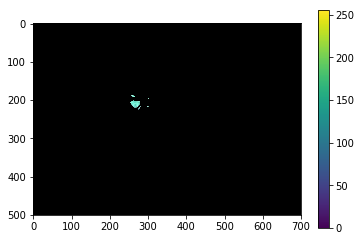

In [63]:
#https://pythonprogramming.net/grabcut-foreground-extraction-python-opencv-tutorial/?completed=/template-matching-python-opencv-tutorial/
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('jungle.png')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (161,79,150,150)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

In [60]:
import cv2
import numpy as np

img_rgb = cv2.imread('jungle.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('spider.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imshow('Detected',img_rgb)

In [58]:
import numpy as np
import cv2
 
image = cv2.imread('jungle.png')
template = cv2.imread('spider.pngg')
 
# resize images
image = cv2.resize(image, (0,0), fx=0.5, fy=0.5) 
template = cv2.resize(template, (0,0), fx=0.5, fy=0.5) 
 
# Convert to grayscale
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
 
# Find template
result = cv2.matchTemplate(imageGray,templateGray, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
h,w = templateGray.shape
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(image,top_left, bottom_right,(0,0,255),4)
 
# Show result
cv2.imshow("Template", template)
cv2.imshow("Result", image)
 
cv2.moveWindow("Template", 10, 50);
cv2.moveWindow("Result", 150, 50);
 
cv2.waitKey(0)

error: /feedstock_root/build_artefacts/opencv_1495334243082/work/opencv-3.2.0/modules/imgproc/src/imgwarp.cpp:3492: error: (-215) ssize.width > 0 && ssize.height > 0 in function resize


In [ ]:
http://www.pyimagesearch.com/2015/01/26/multi-scale-template-matching-using-python-opencv/

In [53]:
!python match.py  -t 'spider.png', -i 'jungle.png', -v VISUALIZE

OpenCV Error: Assertion failed (scn == 3 || scn == 4) in cvtColor, file /feedstock_root/build_artefacts/opencv_1495334243082/work/opencv-3.2.0/modules/imgproc/src/color.cpp, line 9748
Traceback (most recent call last):
  File "match.py", line 20, in <module>
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
cv2.error: /feedstock_root/build_artefacts/opencv_1495334243082/work/opencv-3.2.0/modules/imgproc/src/color.cpp:9748: error: (-215) scn == 3 || scn == 4 in function cvtColor



In [49]:
%%writefile match.py
#!/usr/bin/python
# import the necessary packages
import numpy as np
import argparse
import imutils
import glob
import cv2
 
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-t", "--template", required=True, help="Path to template image")
ap.add_argument("-i", "--images", required=True,
	help="Path to images where template will be matched")
ap.add_argument("-v", "--visualize",
	help="Flag indicating whether or not to visualize each iteration")
args = vars(ap.parse_args())
 
# load the image image, convert it to grayscale, and detect edges
template = cv2.imread(args["template"])
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
cv2.imshow("Template", template)

Writing match.py


In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('jungle.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('spider.png',0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
#res = cv2.matchTemplate(img_gray,template,cv2.TM_CCORR_NORMED)
#res = cv2.matchTemplate(img_gray,template,cv2.TM_CCORR)
#res = cv2.matchTemplate(img_gray,template,cv2.TM_SQDIFF_NORMED)
#res = cv2.matchTemplate(img_gray,template,cv2.TM_SQDIFF)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res.png',img_rgb)

True

Method: %s cv2.TM_CCOEFF
min_val:  -45167604.0
max_val:  44726448.0
min_loc:  (289, 130)
max_loc:  (207, 195)
 


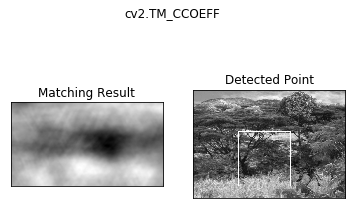

Method: %s cv2.TM_CCOEFF_NORMED
min_val:  -0.318104624748
max_val:  0.289889037609
min_loc:  (291, 131)
max_loc:  (417, 218)
 


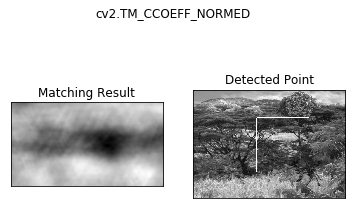

Method: %s cv2.TM_CCORR
min_val:  1214252672.0
max_val:  1742246912.0
min_loc:  (455, 101)
max_loc:  (93, 251)
 


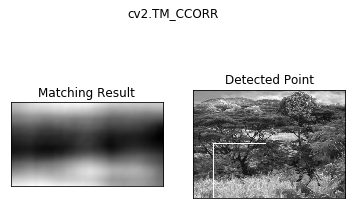

Method: %s cv2.TM_CCORR_NORMED
min_val:  0.85492348671
max_val:  0.931827902794
min_loc:  (289, 130)
max_loc:  (417, 219)
 


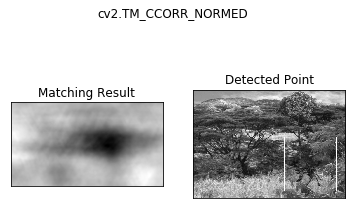

Method: %s cv2.TM_SQDIFF
min_val:  927383552.0
max_val:  1471492864.0
min_loc:  (92, 251)
max_loc:  (294, 130)
 


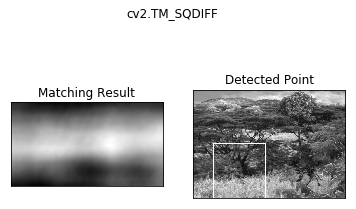

Method: %s cv2.TM_SQDIFF_NORMED
min_val:  0.487258523703
max_val:  1.0
min_loc:  (93, 251)
max_loc:  (459, 73)
 


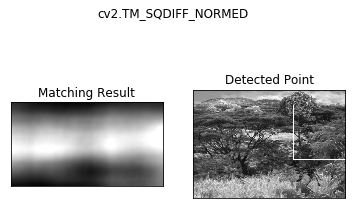

In [29]:
from __future__ import print_function
import cv2
import numpy as np
from matplotlib import pyplot as plt

try:
    img = cv2.imread(r'jungle.png',0)
    template = cv2.imread(r'spider.png',0)
except IOError as e:
    print("({})".format(e))
else:
    img2 = img.copy()
    w, h = template.shape[::-1]

    # All the 6 methods for comparison in a list
    methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
             'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']


for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print("Method: %s" , meth)
    print("min_val: " , min_val)
    print("max_val: " , max_val)
    print("min_loc: " , min_loc)
    print("max_loc: " , max_loc)
    print(" ")
    #If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    #if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    #    top_left = min_loc
    if method in [cv2.TM_SQDIFF, cv2.TM_CCOEFF_NORMED]:
         top_left = min_loc
    
    
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth) 
    #plt.legend([min_val, max_val, min_loc, max_loc], ["min_val", "max_val", "min_loc", "max_loc"])

    plt.show()
    box = img[top_left[1]:top_left[1]+h,0:bottom_right[1]+w]
    cv2.imshow("cropped", box)
    cv2.waitKey(0)

In [16]:
import Gtool
help(Gtool)

Version2.4
Help on package Gtool:

NAME
    Gtool

FILE
    /home/jack/anaconda2/pkgs/Gtool/__init__.py

PACKAGE CONTENTS
    Gtool
    blendoverlay
    datename
    makesquare
    randim
    randsize
    rmblack




In [23]:
#Works well to crop objects that are framed

import cv2
from Gtool import datename
imageSrc = cv2.imread("spider.png")

# First cut the source down slightly
h = imageSrc.shape[0]
w = imageSrc.shape[1]
cropInitial = 50
imageSrc = imageSrc[100:50+(h-cropInitial*2), 50:50+(w-cropInitial*2)]

# Threshold the image and find edges (to reduce the amount of pixels to count)
ret, imageDest = cv2.threshold(imageSrc, 220, 255, cv2.THRESH_BINARY_INV)
imageDest = cv2.Canny(imageDest, 100, 100, 3)

# Create a list of remaining pixels
points = cv2.findNonZero(imageDest)

# Calculate a bounding rectangle for these points
hull = cv2.convexHull(points)
x,y,w,h = cv2.boundingRect(hull)

# Crop the original image to the bounding rectangle
imageResult = imageSrc[y:y+h,x:x+w]
cv2.imwrite("Auto_Crop_"+datename.date_name(), imageResult)

True

# GOOD but not a module ------------------ end

from icrawler.builtin import GoogleImageCrawler

google_crawler = GoogleImageCrawler(parser_threads=2, downloader_threads=4,
                                    storage={'/home/jack/Desktop/deep-dream-generator/notebooks/': 'newfiles'})
google_crawler.crawl(keyword='vintage advertisements 1800s', max_num=50,
                     date_min=None, date_max=None,
                     min_size=(277,277), max_size=None)

In [ ]:
!mkdir /home/jack/Desktop/deep-dream-generator/notebooks/newfiles

In [15]:
from PIL import Image
im = Image.open("test12 cropped.jpg")
im.show()

In [15]:
!locate /PIL/Image

/home/jack/Desktop/usr-local-lib-python2.7/dist-packages/PIL/Image.py
/home/jack/Desktop/usr-local-lib-python2.7/dist-packages/PIL/Image.pyc
/home/jack/Desktop/usr-local-lib-python2.7/dist-packages/PIL/ImageChops.py
/home/jack/Desktop/usr-local-lib-python2.7/dist-packages/PIL/ImageChops.pyc
/home/jack/Desktop/usr-local-lib-python2.7/dist-packages/PIL/ImageCms.py
/home/jack/Desktop/usr-local-lib-python2.7/dist-packages/PIL/ImageCms.pyc
/home/jack/Desktop/usr-local-lib-python2.7/dist-packages/PIL/ImageColor.py
/home/jack/Desktop/usr-local-lib-python2.7/dist-packages/PIL/ImageColor.pyc
/home/jack/Desktop/usr-local-lib-python2.7/dist-packages/PIL/ImageDraw.py
/home/jack/Desktop/usr-local-lib-python2.7/dist-packages/PIL/ImageDraw.pyc
/home/jack/Desktop/usr-local-lib-python2.7/dist-packages/PIL/ImageDraw2.py
/home/jack/Desktop/usr-local-lib-python2.7/dist-packages/PIL/ImageDraw2.pyc
/home/jack/Desktop/usr-local-lib-python2.7/dist-packages/PIL/ImageEnhance.py
/home/jack/Desktop/usr-local-lib-

/home/jack/anaconda2/pkgs/pillow-4.1.1-py27_0/lib/python2.7/site-packages/PIL/Image.py
/home/jack/anaconda2/pkgs/pillow-4.1.1-py27_0/lib/python2.7/site-packages/PIL/Image.pyc
/home/jack/anaconda2/pkgs/pillow-4.1.1-py27_0/lib/python2.7/site-packages/PIL/ImageChops.py
/home/jack/anaconda2/pkgs/pillow-4.1.1-py27_0/lib/python2.7/site-packages/PIL/ImageChops.pyc
/home/jack/anaconda2/pkgs/pillow-4.1.1-py27_0/lib/python2.7/site-packages/PIL/ImageCms.py
/home/jack/anaconda2/pkgs/pillow-4.1.1-py27_0/lib/python2.7/site-packages/PIL/ImageCms.pyc
/home/jack/anaconda2/pkgs/pillow-4.1.1-py27_0/lib/python2.7/site-packages/PIL/ImageColor.py
/home/jack/anaconda2/pkgs/pillow-4.1.1-py27_0/lib/python2.7/site-packages/PIL/ImageColor.pyc
/home/jack/anaconda2/pkgs/pillow-4.1.1-py27_0/lib/python2.7/site-packages/PIL/ImageDraw.py
/home/jack/anaconda2/pkgs/pillow-4.1.1-py27_0/lib/python2.7/site-packages/PIL/ImageDraw.pyc
/home/jack/anaconda2/pkgs/pillow-4.1.1-py27_0/lib/python2.7/site-packages/PIL/ImageDraw2.py

In [ ]:
# %load /home/jack/Desktop/usr-local-lib-python2.7/dist-packages/PIL/Image.py
#
# The Python Imaging Library.
# $Id$
#
# the Image class wrapper
#
# partial release history:
# 1995-09-09 fl   Created
# 1996-03-11 fl   PIL release 0.0 (proof of concept)
# 1996-04-30 fl   PIL release 0.1b1
# 1999-07-28 fl   PIL release 1.0 final
# 2000-06-07 fl   PIL release 1.1
# 2000-10-20 fl   PIL release 1.1.1
# 2001-05-07 fl   PIL release 1.1.2
# 2002-03-15 fl   PIL release 1.1.3
# 2003-05-10 fl   PIL release 1.1.4
# 2005-03-28 fl   PIL release 1.1.5
# 2006-12-02 fl   PIL release 1.1.6
# 2009-11-15 fl   PIL release 1.1.7
#
# Copyright (c) 1997-2009 by Secret Labs AB.  All rights reserved.
# Copyright (c) 1995-2009 by Fredrik Lundh.
#
# See the README file for information on usage and redistribution.
#

from __future__ import print_function

from PIL import VERSION, PILLOW_VERSION, _plugins

import warnings


class DecompressionBombWarning(RuntimeWarning):
    pass


class _imaging_not_installed(object):
    # module placeholder
    def __getattr__(self, id):
        raise ImportError("The _imaging C module is not installed")


# Limit to around a quarter gigabyte for a 24 bit (3 bpp) image
MAX_IMAGE_PIXELS = int(1024 * 1024 * 1024 / 4 / 3)

try:
    # give Tk a chance to set up the environment, in case we're
    # using an _imaging module linked against libtcl/libtk (use
    # __import__ to hide this from naive packagers; we don't really
    # depend on Tk unless ImageTk is used, and that module already
    # imports Tkinter)
    __import__("FixTk")
except ImportError:
    pass

try:
    # If the _imaging C module is not present, Pillow will not load.
    # Note that other modules should not refer to _imaging directly;
    # import Image and use the Image.core variable instead.
    # Also note that Image.core is not a publicly documented interface,
    # and should be considered private and subject to change.
    from PIL import _imaging as core
    if PILLOW_VERSION != getattr(core, 'PILLOW_VERSION', None):
        raise ImportError("The _imaging extension was built for another "
                          " version of Pillow or PIL")

except ImportError as v:
    core = _imaging_not_installed()
    # Explanations for ways that we know we might have an import error
    if str(v).startswith("Module use of python"):
        # The _imaging C module is present, but not compiled for
        # the right version (windows only).  Print a warning, if
        # possible.
        warnings.warn(
            "The _imaging extension was built for another version "
            "of Python.",
            RuntimeWarning
            )
    elif str(v).startswith("The _imaging extension"):
        warnings.warn(str(v), RuntimeWarning)
    elif "Symbol not found: _PyUnicodeUCS2_FromString" in str(v):
        warnings.warn(
            "The _imaging extension was built for Python with UCS2 support; "
            "recompile PIL or build Python --without-wide-unicode. ",
            RuntimeWarning
            )
    elif "Symbol not found: _PyUnicodeUCS4_FromString" in str(v):
        warnings.warn(
            "The _imaging extension was built for Python with UCS4 support; "
            "recompile PIL or build Python --with-wide-unicode. ",
            RuntimeWarning
            )
    # Fail here anyway. Don't let people run with a mostly broken Pillow.
    # see docs/porting-pil-to-pillow.rst
    raise

try:
    import builtins
except ImportError:
    import __builtin__
    builtins = __builtin__

from PIL import ImageMode
from PIL._binary import i8
from PIL._util import isPath
from PIL._util import isStringType
from PIL._util import deferred_error

import os
import sys
import io
import struct

# type stuff
import collections
import numbers

# works everywhere, win for pypy, not cpython
USE_CFFI_ACCESS = hasattr(sys, 'pypy_version_info')
try:
    import cffi
    HAS_CFFI = True
except ImportError:
    HAS_CFFI = False


def isImageType(t):
    """
    Checks if an object is an image object.

    .. warning::

       This function is for internal use only.

    :param t: object to check if it's an image
    :returns: True if the object is an image
    """
    return hasattr(t, "im")

#
# Debug level

DEBUG = 0

#
# Constants (also defined in _imagingmodule.c!)

NONE = 0

# transpose
FLIP_LEFT_RIGHT = 0
FLIP_TOP_BOTTOM = 1
ROTATE_90 = 2
ROTATE_180 = 3
ROTATE_270 = 4
TRANSPOSE = 5

# transforms
AFFINE = 0
EXTENT = 1
PERSPECTIVE = 2
QUAD = 3
MESH = 4

# resampling filters
NEAREST = NONE = 0
LANCZOS = ANTIALIAS = 1
BILINEAR = LINEAR = 2
BICUBIC = CUBIC = 3

# dithers
NONE = 0
NEAREST = 0
ORDERED = 1  # Not yet implemented
RASTERIZE = 2  # Not yet implemented
FLOYDSTEINBERG = 3  # default

# palettes/quantizers
WEB = 0
ADAPTIVE = 1

MEDIANCUT = 0
MAXCOVERAGE = 1
FASTOCTREE = 2

# categories
NORMAL = 0
SEQUENCE = 1
CONTAINER = 2

if hasattr(core, 'DEFAULT_STRATEGY'):
    DEFAULT_STRATEGY = core.DEFAULT_STRATEGY
    FILTERED = core.FILTERED
    HUFFMAN_ONLY = core.HUFFMAN_ONLY
    RLE = core.RLE
    FIXED = core.FIXED


# --------------------------------------------------------------------
# Registries

ID = []
OPEN = {}
MIME = {}
SAVE = {}
SAVE_ALL = {}
EXTENSION = {}

# --------------------------------------------------------------------
# Modes supported by this version

_MODEINFO = {
    # NOTE: this table will be removed in future versions.  use
    # getmode* functions or ImageMode descriptors instead.

    # official modes
    "1": ("L", "L", ("1",)),
    "L": ("L", "L", ("L",)),
    "I": ("L", "I", ("I",)),
    "F": ("L", "F", ("F",)),
    "P": ("RGB", "L", ("P",)),
    "RGB": ("RGB", "L", ("R", "G", "B")),
    "RGBX": ("RGB", "L", ("R", "G", "B", "X")),
    "RGBA": ("RGB", "L", ("R", "G", "B", "A")),
    "CMYK": ("RGB", "L", ("C", "M", "Y", "K")),
    "YCbCr": ("RGB", "L", ("Y", "Cb", "Cr")),
    "LAB": ("RGB", "L", ("L", "A", "B")),
    "HSV": ("RGB", "L", ("H", "S", "V")),

    # Experimental modes include I;16, I;16L, I;16B, RGBa, BGR;15, and
    # BGR;24.  Use these modes only if you know exactly what you're
    # doing...

}

if sys.byteorder == 'little':
    _ENDIAN = '<'
else:
    _ENDIAN = '>'

_MODE_CONV = {
    # official modes
    "1": ('|b1', None),  # broken
    "L": ('|u1', None),
    "I": (_ENDIAN + 'i4', None),
    "F": (_ENDIAN + 'f4', None),
    "P": ('|u1', None),
    "RGB": ('|u1', 3),
    "RGBX": ('|u1', 4),
    "RGBA": ('|u1', 4),
    "CMYK": ('|u1', 4),
    "YCbCr": ('|u1', 3),
    "LAB": ('|u1', 3),  # UNDONE - unsigned |u1i1i1
    # I;16 == I;16L, and I;32 == I;32L
    "I;16": ('<u2', None),
    "I;16B": ('>u2', None),
    "I;16L": ('<u2', None),
    "I;16S": ('<i2', None),
    "I;16BS": ('>i2', None),
    "I;16LS": ('<i2', None),
    "I;32": ('<u4', None),
    "I;32B": ('>u4', None),
    "I;32L": ('<u4', None),
    "I;32S": ('<i4', None),
    "I;32BS": ('>i4', None),
    "I;32LS": ('<i4', None),
}


def _conv_type_shape(im):
    shape = im.size[1], im.size[0]
    typ, extra = _MODE_CONV[im.mode]
    if extra is None:
        return shape, typ
    else:
        return shape+(extra,), typ


MODES = sorted(_MODEINFO.keys())

# raw modes that may be memory mapped.  NOTE: if you change this, you
# may have to modify the stride calculation in map.c too!
_MAPMODES = ("L", "P", "RGBX", "RGBA", "CMYK", "I;16", "I;16L", "I;16B")


def getmodebase(mode):
    """
    Gets the "base" mode for given mode.  This function returns "L" for
    images that contain grayscale data, and "RGB" for images that
    contain color data.

    :param mode: Input mode.
    :returns: "L" or "RGB".
    :exception KeyError: If the input mode was not a standard mode.
    """
    return ImageMode.getmode(mode).basemode


def getmodetype(mode):
    """
    Gets the storage type mode.  Given a mode, this function returns a
    single-layer mode suitable for storing individual bands.

    :param mode: Input mode.
    :returns: "L", "I", or "F".
    :exception KeyError: If the input mode was not a standard mode.
    """
    return ImageMode.getmode(mode).basetype


def getmodebandnames(mode):
    """
    Gets a list of individual band names.  Given a mode, this function returns
    a tuple containing the names of individual bands (use
    :py:method:`~PIL.Image.getmodetype` to get the mode used to store each
    individual band.

    :param mode: Input mode.
    :returns: A tuple containing band names.  The length of the tuple
        gives the number of bands in an image of the given mode.
    :exception KeyError: If the input mode was not a standard mode.
    """
    return ImageMode.getmode(mode).bands


def getmodebands(mode):
    """
    Gets the number of individual bands for this mode.

    :param mode: Input mode.
    :returns: The number of bands in this mode.
    :exception KeyError: If the input mode was not a standard mode.
    """
    return len(ImageMode.getmode(mode).bands)

# --------------------------------------------------------------------
# Helpers

_initialized = 0


def preinit():
    "Explicitly load standard file format drivers."

    global _initialized
    if _initialized >= 1:
        return

    try:
        from PIL import BmpImagePlugin
    except ImportError:
        pass
    try:
        from PIL import GifImagePlugin
    except ImportError:
        pass
    try:
        from PIL import JpegImagePlugin
    except ImportError:
        pass
    try:
        from PIL import PpmImagePlugin
    except ImportError:
        pass
    try:
        from PIL import PngImagePlugin
    except ImportError:
        pass
#   try:
#       import TiffImagePlugin
#   except ImportError:
#       pass

    _initialized = 1


def init():
    """
    Explicitly initializes the Python Imaging Library. This function
    loads all available file format drivers.
    """

    global _initialized
    if _initialized >= 2:
        return 0

    for plugin in _plugins:
        try:
            if DEBUG:
                print("Importing %s" % plugin)
            __import__("PIL.%s" % plugin, globals(), locals(), [])
        except ImportError:
            if DEBUG:
                print("Image: failed to import", end=' ')
                print(plugin, ":", sys.exc_info()[1])

    if OPEN or SAVE:
        _initialized = 2
        return 1


# --------------------------------------------------------------------
# Codec factories (used by tobytes/frombytes and ImageFile.load)

def _getdecoder(mode, decoder_name, args, extra=()):

    # tweak arguments
    if args is None:
        args = ()
    elif not isinstance(args, tuple):
        args = (args,)

    try:
        # get decoder
        decoder = getattr(core, decoder_name + "_decoder")
        # print(decoder, mode, args + extra)
        return decoder(mode, *args + extra)
    except AttributeError:
        raise IOError("decoder %s not available" % decoder_name)


def _getencoder(mode, encoder_name, args, extra=()):

    # tweak arguments
    if args is None:
        args = ()
    elif not isinstance(args, tuple):
        args = (args,)

    try:
        # get encoder
        encoder = getattr(core, encoder_name + "_encoder")
        # print(encoder, mode, args + extra)
        return encoder(mode, *args + extra)
    except AttributeError:
        raise IOError("encoder %s not available" % encoder_name)


# --------------------------------------------------------------------
# Simple expression analyzer

def coerce_e(value):
    return value if isinstance(value, _E) else _E(value)


class _E(object):
    def __init__(self, data):
        self.data = data

    def __add__(self, other):
        return _E((self.data, "__add__", coerce_e(other).data))

    def __mul__(self, other):
        return _E((self.data, "__mul__", coerce_e(other).data))


def _getscaleoffset(expr):
    stub = ["stub"]
    data = expr(_E(stub)).data
    try:
        (a, b, c) = data  # simplified syntax
        if (a is stub and b == "__mul__" and isinstance(c, numbers.Number)):
            return c, 0.0
        if a is stub and b == "__add__" and isinstance(c, numbers.Number):
            return 1.0, c
    except TypeError:
        pass
    try:
        ((a, b, c), d, e) = data  # full syntax
        if (a is stub and b == "__mul__" and isinstance(c, numbers.Number) and
                d == "__add__" and isinstance(e, numbers.Number)):
            return c, e
    except TypeError:
        pass
    raise ValueError("illegal expression")


# --------------------------------------------------------------------
# Implementation wrapper

class Image(object):
    """
    This class represents an image object.  To create
    :py:class:`~PIL.Image.Image` objects, use the appropriate factory
    functions.  There's hardly ever any reason to call the Image constructor
    directly.

    * :py:func:`~PIL.Image.open`
    * :py:func:`~PIL.Image.new`
    * :py:func:`~PIL.Image.frombytes`
    """
    format = None
    format_description = None

    def __init__(self):
        # FIXME: take "new" parameters / other image?
        # FIXME: turn mode and size into delegating properties?
        self.im = None
        self.mode = ""
        self.size = (0, 0)
        self.palette = None
        self.info = {}
        self.category = NORMAL
        self.readonly = 0
        self.pyaccess = None

    @property
    def width(self):
        return self.size[0]

    @property
    def height(self):
        return self.size[1]

    def _new(self, im):
        new = Image()
        new.im = im
        new.mode = im.mode
        new.size = im.size
        if self.palette:
            new.palette = self.palette.copy()
        if im.mode == "P" and not new.palette:
            from PIL import ImagePalette
            new.palette = ImagePalette.ImagePalette()
        try:
            new.info = self.info.copy()
        except AttributeError:
            # fallback (pre-1.5.2)
            new.info = {}
            for k, v in self.info:
                new.info[k] = v
        return new

    _makeself = _new  # compatibility

    # Context Manager Support
    def __enter__(self):
        return self

    def __exit__(self, *args):
        self.close()

    def close(self):
        """
        Closes the file pointer, if possible.

        This operation will destroy the image core and release its memory.
        The image data will be unusable afterward.

        This function is only required to close images that have not
        had their file read and closed by the
        :py:meth:`~PIL.Image.Image.load` method.
        """
        try:
            self.fp.close()
        except Exception as msg:
            if DEBUG:
                print("Error closing: %s" % msg)

        # Instead of simply setting to None, we're setting up a
        # deferred error that will better explain that the core image
        # object is gone.
        self.im = deferred_error(ValueError("Operation on closed image"))

    def _copy(self):
        self.load()
        self.im = self.im.copy()
        self.pyaccess = None
        self.readonly = 0

    def _dump(self, file=None, format=None):
        import tempfile
        suffix = ''
        if format:
            suffix = '.'+format
        if not file:
            f, file = tempfile.mkstemp(suffix)
            os.close(f)

        self.load()
        if not format or format == "PPM":
            self.im.save_ppm(file)
        else:
            if not file.endswith(format):
                file = file + "." + format
            self.save(file, format)
        return file

    def __eq__(self, other):
        if self.__class__.__name__ != other.__class__.__name__:
            return False
        a = (self.mode == other.mode)
        b = (self.size == other.size)
        c = (self.getpalette() == other.getpalette())
        d = (self.info == other.info)
        e = (self.category == other.category)
        f = (self.readonly == other.readonly)
        g = (self.tobytes() == other.tobytes())
        return a and b and c and d and e and f and g

    def __ne__(self, other):
        eq = (self == other)
        return not eq

    def __repr__(self):
        return "<%s.%s image mode=%s size=%dx%d at 0x%X>" % (
            self.__class__.__module__, self.__class__.__name__,
            self.mode, self.size[0], self.size[1],
            id(self)
            )

    def _repr_png_(self):
        """ iPython display hook support

        :returns: png version of the image as bytes
        """
        from io import BytesIO
        b = BytesIO()
        self.save(b, 'PNG')
        return b.getvalue()

    def __getattr__(self, name):
        if name == "__array_interface__":
            # numpy array interface support
            new = {}
            shape, typestr = _conv_type_shape(self)
            new['shape'] = shape
            new['typestr'] = typestr
            new['data'] = self.tobytes()
            return new
        raise AttributeError(name)

    def __getstate__(self):
        return [
            self.info,
            self.mode,
            self.size,
            self.getpalette(),
            self.tobytes()]

    def __setstate__(self, state):
        Image.__init__(self)
        self.tile = []
        info, mode, size, palette, data = state
        self.info = info
        self.mode = mode
        self.size = size
        self.im = core.new(mode, size)
        if mode in ("L", "P") and palette:
            self.putpalette(palette)
        self.frombytes(data)

    def tobytes(self, encoder_name="raw", *args):
        """
        Return image as a bytes object

        :param encoder_name: What encoder to use.  The default is to
                             use the standard "raw" encoder.
        :param args: Extra arguments to the encoder.
        :rtype: A bytes object.
        """

        # may pass tuple instead of argument list
        if len(args) == 1 and isinstance(args[0], tuple):
            args = args[0]

        if encoder_name == "raw" and args == ():
            args = self.mode

        self.load()

        # unpack data
        e = _getencoder(self.mode, encoder_name, args)
        e.setimage(self.im)

        bufsize = max(65536, self.size[0] * 4)  # see RawEncode.c

        data = []
        while True:
            l, s, d = e.encode(bufsize)
            data.append(d)
            if s:
                break
        if s < 0:
            raise RuntimeError("encoder error %d in tobytes" % s)

        return b"".join(data)

    # Declare tostring as alias to tobytes
    def tostring(self, *args, **kw):
        """Deprecated alias to tobytes.

        .. deprecated:: 2.0
        """
        warnings.warn(
            'tostring() is deprecated. Please call tobytes() instead.',
            DeprecationWarning,
            stacklevel=2,
        )
        return self.tobytes(*args, **kw)

    def tobitmap(self, name="image"):
        """
        Returns the image converted to an X11 bitmap.

        .. note:: This method only works for mode "1" images.

        :param name: The name prefix to use for the bitmap variables.
        :returns: A string containing an X11 bitmap.
        :raises ValueError: If the mode is not "1"
        """

        self.load()
        if self.mode != "1":
            raise ValueError("not a bitmap")
        data = self.tobytes("xbm")
        return b"".join([
            ("#define %s_width %d\n" % (name, self.size[0])).encode('ascii'),
            ("#define %s_height %d\n" % (name, self.size[1])).encode('ascii'),
            ("static char %s_bits[] = {\n" % name).encode('ascii'), data, b"};"
            ])

    def frombytes(self, data, decoder_name="raw", *args):
        """
        Loads this image with pixel data from a bytes object.

        This method is similar to the :py:func:`~PIL.Image.frombytes` function,
        but loads data into this image instead of creating a new image object.
        """

        # may pass tuple instead of argument list
        if len(args) == 1 and isinstance(args[0], tuple):
            args = args[0]

        # default format
        if decoder_name == "raw" and args == ():
            args = self.mode

        # unpack data
        d = _getdecoder(self.mode, decoder_name, args)
        d.setimage(self.im)
        s = d.decode(data)

        if s[0] >= 0:
            raise ValueError("not enough image data")
        if s[1] != 0:
            raise ValueError("cannot decode image data")

    def fromstring(self, *args, **kw):
        """Deprecated alias to frombytes.

        .. deprecated:: 2.0
        """
        warnings.warn(
            'fromstring() is deprecated. Please call frombytes() instead.',
            DeprecationWarning)
        return self.frombytes(*args, **kw)

    def load(self):
        """
        Allocates storage for the image and loads the pixel data.  In
        normal cases, you don't need to call this method, since the
        Image class automatically loads an opened image when it is
        accessed for the first time. This method will close the file
        associated with the image.

        :returns: An image access object.
        :rtype: :ref:`PixelAccess` or :py:class:`PIL.PyAccess`
        """
        if self.im and self.palette and self.palette.dirty:
            # realize palette
            self.im.putpalette(*self.palette.getdata())
            self.palette.dirty = 0
            self.palette.mode = "RGB"
            self.palette.rawmode = None
            if "transparency" in self.info:
                if isinstance(self.info["transparency"], int):
                    self.im.putpalettealpha(self.info["transparency"], 0)
                else:
                    self.im.putpalettealphas(self.info["transparency"])
                self.palette.mode = "RGBA"

        if self.im:
            if HAS_CFFI and USE_CFFI_ACCESS:
                if self.pyaccess:
                    return self.pyaccess
                from PIL import PyAccess
                self.pyaccess = PyAccess.new(self, self.readonly)
                if self.pyaccess:
                    return self.pyaccess
            return self.im.pixel_access(self.readonly)

    def verify(self):
        """
        Verifies the contents of a file. For data read from a file, this
        method attempts to determine if the file is broken, without
        actually decoding the image data.  If this method finds any
        problems, it raises suitable exceptions.  If you need to load
        the image after using this method, you must reopen the image
        file.
        """
        pass

    def convert(self, mode=None, matrix=None, dither=None,
                palette=WEB, colors=256):
        """
        Returns a converted copy of this image. For the "P" mode, this
        method translates pixels through the palette.  If mode is
        omitted, a mode is chosen so that all information in the image
        and the palette can be represented without a palette.

        The current version supports all possible conversions between
        "L", "RGB" and "CMYK." The **matrix** argument only supports "L"
        and "RGB".

        When translating a color image to black and white (mode "L"),
        the library uses the ITU-R 601-2 luma transform::

            L = R * 299/1000 + G * 587/1000 + B * 114/1000

        The default method of converting a greyscale ("L") or "RGB"
        image into a bilevel (mode "1") image uses Floyd-Steinberg
        dither to approximate the original image luminosity levels. If
        dither is NONE, all non-zero values are set to 255 (white). To
        use other thresholds, use the :py:meth:`~PIL.Image.Image.point`
        method.

        :param mode: The requested mode. See: :ref:`concept-modes`.
        :param matrix: An optional conversion matrix.  If given, this
           should be 4- or 16-tuple containing floating point values.
        :param dither: Dithering method, used when converting from
           mode "RGB" to "P" or from "RGB" or "L" to "1".
           Available methods are NONE or FLOYDSTEINBERG (default).
        :param palette: Palette to use when converting from mode "RGB"
           to "P".  Available palettes are WEB or ADAPTIVE.
        :param colors: Number of colors to use for the ADAPTIVE palette.
           Defaults to 256.
        :rtype: :py:class:`~PIL.Image.Image`
        :returns: An :py:class:`~PIL.Image.Image` object.
        """

        if not mode:
            # determine default mode
            if self.mode == "P":
                self.load()
                if self.palette:
                    mode = self.palette.mode
                else:
                    mode = "RGB"
            else:
                return self.copy()

        self.load()

        if matrix:
            # matrix conversion
            if mode not in ("L", "RGB"):
                raise ValueError("illegal conversion")
            im = self.im.convert_matrix(mode, matrix)
            return self._new(im)

        if mode == "P" and self.mode == "RGBA":
            return self.quantize(colors)

        trns = None
        delete_trns = False
        # transparency handling
        if "transparency" in self.info and \
                self.info['transparency'] is not None:
            if self.mode in ('L', 'RGB') and mode == 'RGBA':
                # Use transparent conversion to promote from transparent
                # color to an alpha channel.
                return self._new(self.im.convert_transparent(
                    mode, self.info['transparency']))
            elif self.mode in ('L', 'RGB', 'P') and mode in ('L', 'RGB', 'P'):
                t = self.info['transparency']
                if isinstance(t, bytes):
                    # Dragons. This can't be represented by a single color
                    warnings.warn('Palette images with Transparency  ' +
                                  ' expressed in bytes should be converted ' +
                                  'to RGBA images')
                    delete_trns = True
                else:
                    # get the new transparency color.
                    # use existing conversions
                    trns_im = Image()._new(core.new(self.mode, (1, 1)))
                    if self.mode == 'P':
                        trns_im.putpalette(self.palette)
                    trns_im.putpixel((0, 0), t)

                    if mode in ('L', 'RGB'):
                        trns_im = trns_im.convert(mode)
                    else:
                        # can't just retrieve the palette number, got to do it
                        # after quantization.
                        trns_im = trns_im.convert('RGB')
                    trns = trns_im.getpixel((0, 0))

            elif self.mode == 'P' and mode == 'RGBA':
                t = self.info['transparency']
                delete_trns = True

                if isinstance(t, bytes):
                    self.im.putpalettealphas(t)
                elif isinstance(t, int):
                    self.im.putpalettealpha(t, 0)
                else:
                    raise ValueError("Transparency for P mode should" +
                                     " be bytes or int")

        if mode == "P" and palette == ADAPTIVE:
            im = self.im.quantize(colors)
            new = self._new(im)
            from PIL import ImagePalette
            new.palette = ImagePalette.raw("RGB", new.im.getpalette("RGB"))
            if delete_trns:
                # This could possibly happen if we requantize to fewer colors.
                # The transparency would be totally off in that case.
                del(new.info['transparency'])
            if trns is not None:
                try:
                    new.info['transparency'] = new.palette.getcolor(trns)
                except:
                    # if we can't make a transparent color, don't leave the old
                    # transparency hanging around to mess us up.
                    del(new.info['transparency'])
                    warnings.warn("Couldn't allocate palette entry " +
                                  "for transparency")
            return new

        # colorspace conversion
        if dither is None:
            dither = FLOYDSTEINBERG

        try:
            im = self.im.convert(mode, dither)
        except ValueError:
            try:
                # normalize source image and try again
                im = self.im.convert(getmodebase(self.mode))
                im = im.convert(mode, dither)
            except KeyError:
                raise ValueError("illegal conversion")

        new_im = self._new(im)
        if delete_trns:
            # crash fail if we leave a bytes transparency in an rgb/l mode.
            del(new_im.info['transparency'])
        if trns is not None:
            if new_im.mode == 'P':
                try:
                    new_im.info['transparency'] = new_im.palette.getcolor(trns)
                except:
                    del(new_im.info['transparency'])
                    warnings.warn("Couldn't allocate palette entry " +
                                  "for transparency")
            else:
                new_im.info['transparency'] = trns
        return new_im

    def quantize(self, colors=256, method=None, kmeans=0, palette=None):
        """
        Convert the image to 'P' mode with the specified number
        of colors.

        :param colors: The desired number of colors, <= 256
        :param method: 0 = median cut
                       1 = maximum coverage
                       2 = fast octree
        :param kmeans: Integer
        :param palette: Quantize to the :py:class:`PIL.ImagingPalette` palette.
        :returns: A new image

        """

        self.load()

        if method is None:
            # defaults:
            method = 0
            if self.mode == 'RGBA':
                method = 2

        if self.mode == 'RGBA' and method != 2:
            # Caller specified an invalid mode.
            raise ValueError('Fast Octree (method == 2) is the ' +
                             ' only valid method for quantizing RGBA images')

        if palette:
            # use palette from reference image
            palette.load()
            if palette.mode != "P":
                raise ValueError("bad mode for palette image")
            if self.mode != "RGB" and self.mode != "L":
                raise ValueError(
                    "only RGB or L mode images can be quantized to a palette"
                    )
            im = self.im.convert("P", 1, palette.im)
            return self._makeself(im)

        im = self.im.quantize(colors, method, kmeans)
        return self._new(im)

    def copy(self):
        """
        Copies this image. Use this method if you wish to paste things
        into an image, but still retain the original.

        :rtype: :py:class:`~PIL.Image.Image`
        :returns: An :py:class:`~PIL.Image.Image` object.
        """
        self.load()
        im = self.im.copy()
        return self._new(im)

    def crop(self, box=None):
        """
        Returns a rectangular region from this image. The box is a
        4-tuple defining the left, upper, right, and lower pixel
        coordinate.

        This is a lazy operation.  Changes to the source image may or
        may not be reflected in the cropped image.  To break the
        connection, call the :py:meth:`~PIL.Image.Image.load` method on
        the cropped copy.

        :param box: The crop rectangle, as a (left, upper, right, lower)-tuple.
        :rtype: :py:class:`~PIL.Image.Image`
        :returns: An :py:class:`~PIL.Image.Image` object.
        """

        self.load()
        if box is None:
            return self.copy()

        # lazy operation
        return _ImageCrop(self, box)

    def draft(self, mode, size):
        """
        Configures the image file loader so it returns a version of the
        image that as closely as possible matches the given mode and
        size.  For example, you can use this method to convert a color
        JPEG to greyscale while loading it, or to extract a 128x192
        version from a PCD file.

        Note that this method modifies the :py:class:`~PIL.Image.Image` object
        in place.  If the image has already been loaded, this method has no
        effect.

        :param mode: The requested mode.
        :param size: The requested size.
        """
        pass

    def _expand(self, xmargin, ymargin=None):
        if ymargin is None:
            ymargin = xmargin
        self.load()
        return self._new(self.im.expand(xmargin, ymargin, 0))

    def filter(self, filter):
        """
        Filters this image using the given filter.  For a list of
        available filters, see the :py:mod:`~PIL.ImageFilter` module.

        :param filter: Filter kernel.
        :returns: An :py:class:`~PIL.Image.Image` object.  """

        self.load()

        if isinstance(filter, collections.Callable):
            filter = filter()
        if not hasattr(filter, "filter"):
            raise TypeError("filter argument should be ImageFilter.Filter " +
                            "instance or class")

        if self.im.bands == 1:
            return self._new(filter.filter(self.im))
        # fix to handle multiband images since _imaging doesn't
        ims = []
        for c in range(self.im.bands):
            ims.append(self._new(filter.filter(self.im.getband(c))))
        return merge(self.mode, ims)

    def getbands(self):
        """
        Returns a tuple containing the name of each band in this image.
        For example, **getbands** on an RGB image returns ("R", "G", "B").

        :returns: A tuple containing band names.
        :rtype: tuple
        """
        return ImageMode.getmode(self.mode).bands

    def getbbox(self):
        """
        Calculates the bounding box of the non-zero regions in the
        image.

        :returns: The bounding box is returned as a 4-tuple defining the
           left, upper, right, and lower pixel coordinate. If the image
           is completely empty, this method returns None.

        """

        self.load()
        return self.im.getbbox()

    def getcolors(self, maxcolors=256):
        """
        Returns a list of colors used in this image.

        :param maxcolors: Maximum number of colors.  If this number is
           exceeded, this method returns None.  The default limit is
           256 colors.
        :returns: An unsorted list of (count, pixel) values.
        """

        self.load()
        if self.mode in ("1", "L", "P"):
            h = self.im.histogram()
            out = []
            for i in range(256):
                if h[i]:
                    out.append((h[i], i))
            if len(out) > maxcolors:
                return None
            return out
        return self.im.getcolors(maxcolors)

    def getdata(self, band=None):
        """
        Returns the contents of this image as a sequence object
        containing pixel values.  The sequence object is flattened, so
        that values for line one follow directly after the values of
        line zero, and so on.

        Note that the sequence object returned by this method is an
        internal PIL data type, which only supports certain sequence
        operations.  To convert it to an ordinary sequence (e.g. for
        printing), use **list(im.getdata())**.

        :param band: What band to return.  The default is to return
           all bands.  To return a single band, pass in the index
           value (e.g. 0 to get the "R" band from an "RGB" image).
        :returns: A sequence-like object.
        """

        self.load()
        if band is not None:
            return self.im.getband(band)
        return self.im  # could be abused

    def getextrema(self):
        """
        Gets the the minimum and maximum pixel values for each band in
        the image.

        :returns: For a single-band image, a 2-tuple containing the
           minimum and maximum pixel value.  For a multi-band image,
           a tuple containing one 2-tuple for each band.
        """

        self.load()
        if self.im.bands > 1:
            extrema = []
            for i in range(self.im.bands):
                extrema.append(self.im.getband(i).getextrema())
            return tuple(extrema)
        return self.im.getextrema()

    def getim(self):
        """
        Returns a capsule that points to the internal image memory.

        :returns: A capsule object.
        """

        self.load()
        return self.im.ptr

    def getpalette(self):
        """
        Returns the image palette as a list.

        :returns: A list of color values [r, g, b, ...], or None if the
           image has no palette.
        """

        self.load()
        try:
            if bytes is str:
                return [i8(c) for c in self.im.getpalette()]
            else:
                return list(self.im.getpalette())
        except ValueError:
            return None  # no palette

    def getpixel(self, xy):
        """
        Returns the pixel value at a given position.

        :param xy: The coordinate, given as (x, y).
        :returns: The pixel value.  If the image is a multi-layer image,
           this method returns a tuple.
        """

        self.load()
        if self.pyaccess:
            return self.pyaccess.getpixel(xy)
        return self.im.getpixel(xy)

    def getprojection(self):
        """
        Get projection to x and y axes

        :returns: Two sequences, indicating where there are non-zero
            pixels along the X-axis and the Y-axis, respectively.
        """

        self.load()
        x, y = self.im.getprojection()
        return [i8(c) for c in x], [i8(c) for c in y]

    def histogram(self, mask=None, extrema=None):
        """
        Returns a histogram for the image. The histogram is returned as
        a list of pixel counts, one for each pixel value in the source
        image. If the image has more than one band, the histograms for
        all bands are concatenated (for example, the histogram for an
        "RGB" image contains 768 values).

        A bilevel image (mode "1") is treated as a greyscale ("L") image
        by this method.

        If a mask is provided, the method returns a histogram for those
        parts of the image where the mask image is non-zero. The mask
        image must have the same size as the image, and be either a
        bi-level image (mode "1") or a greyscale image ("L").

        :param mask: An optional mask.
        :returns: A list containing pixel counts.
        """
        self.load()
        if mask:
            mask.load()
            return self.im.histogram((0, 0), mask.im)
        if self.mode in ("I", "F"):
            if extrema is None:
                extrema = self.getextrema()
            return self.im.histogram(extrema)
        return self.im.histogram()

    def offset(self, xoffset, yoffset=None):
        """
        .. deprecated:: 2.0

        .. note:: New code should use :py:func:`PIL.ImageChops.offset`.

        Returns a copy of the image where the data has been offset by the given
        distances. Data wraps around the edges. If **yoffset** is omitted, it
        is assumed to be equal to **xoffset**.

        :param xoffset: The horizontal distance.
        :param yoffset: The vertical distance.  If omitted, both
           distances are set to the same value.
        :returns: An :py:class:`~PIL.Image.Image` object.
        """
        if warnings:
            warnings.warn(
                "'offset' is deprecated; use 'ImageChops.offset' instead",
                DeprecationWarning, stacklevel=2
                )
        from PIL import ImageChops
        return ImageChops.offset(self, xoffset, yoffset)

    def paste(self, im, box=None, mask=None):
        """
        Pastes another image into this image. The box argument is either
        a 2-tuple giving the upper left corner, a 4-tuple defining the
        left, upper, right, and lower pixel coordinate, or None (same as
        (0, 0)).  If a 4-tuple is given, the size of the pasted image
        must match the size of the region.

        If the modes don't match, the pasted image is converted to the mode of
        this image (see the :py:meth:`~PIL.Image.Image.convert` method for
        details).

        Instead of an image, the source can be a integer or tuple
        containing pixel values.  The method then fills the region
        with the given color.  When creating RGB images, you can
        also use color strings as supported by the ImageColor module.

        If a mask is given, this method updates only the regions
        indicated by the mask.  You can use either "1", "L" or "RGBA"
        images (in the latter case, the alpha band is used as mask).
        Where the mask is 255, the given image is copied as is.  Where
        the mask is 0, the current value is preserved.  Intermediate
        values will mix the two images together, including their alpha
        channels if they have them.

        See :py:meth:`~PIL.Image.Image.alpha_composite` if you want to
        combine images with respect to their alpha channels.

        :param im: Source image or pixel value (integer or tuple).
        :param box: An optional 4-tuple giving the region to paste into.
           If a 2-tuple is used instead, it's treated as the upper left
           corner.  If omitted or None, the source is pasted into the
           upper left corner.

           If an image is given as the second argument and there is no
           third, the box defaults to (0, 0), and the second argument
           is interpreted as a mask image.
        :param mask: An optional mask image.
        """

        if isImageType(box) and mask is None:
            # abbreviated paste(im, mask) syntax
            mask = box
            box = None

        if box is None:
            # cover all of self
            box = (0, 0) + self.size

        if len(box) == 2:
            # lower left corner given; get size from image or mask
            if isImageType(im):
                size = im.size
            elif isImageType(mask):
                size = mask.size
            else:
                # FIXME: use self.size here?
                raise ValueError(
                    "cannot determine region size; use 4-item box"
                    )
            box = box + (box[0]+size[0], box[1]+size[1])

        if isStringType(im):
            from PIL import ImageColor
            im = ImageColor.getcolor(im, self.mode)

        elif isImageType(im):
            im.load()
            if self.mode != im.mode:
                if self.mode != "RGB" or im.mode not in ("RGBA", "RGBa"):
                    # should use an adapter for this!
                    im = im.convert(self.mode)
            im = im.im

        self.load()
        if self.readonly:
            self._copy()

        if mask:
            mask.load()
            self.im.paste(im, box, mask.im)
        else:
            self.im.paste(im, box)

    def point(self, lut, mode=None):
        """
        Maps this image through a lookup table or function.

        :param lut: A lookup table, containing 256 (or 65336 if
           self.mode=="I" and mode == "L") values per band in the
           image.  A function can be used instead, it should take a
           single argument. The function is called once for each
           possible pixel value, and the resulting table is applied to
           all bands of the image.
        :param mode: Output mode (default is same as input).  In the
           current version, this can only be used if the source image
           has mode "L" or "P", and the output has mode "1" or the
           source image mode is "I" and the output mode is "L".
        :returns: An :py:class:`~PIL.Image.Image` object.
        """

        self.load()

        if isinstance(lut, ImagePointHandler):
            return lut.point(self)

        if callable(lut):
            # if it isn't a list, it should be a function
            if self.mode in ("I", "I;16", "F"):
                # check if the function can be used with point_transform
                # UNDONE wiredfool -- I think this prevents us from ever doing
                # a gamma function point transform on > 8bit images.
                scale, offset = _getscaleoffset(lut)
                return self._new(self.im.point_transform(scale, offset))
            # for other modes, convert the function to a table
            lut = [lut(i) for i in range(256)] * self.im.bands

        if self.mode == "F":
            # FIXME: _imaging returns a confusing error message for this case
            raise ValueError("point operation not supported for this mode")

        return self._new(self.im.point(lut, mode))

    def putalpha(self, alpha):
        """
        Adds or replaces the alpha layer in this image.  If the image
        does not have an alpha layer, it's converted to "LA" or "RGBA".
        The new layer must be either "L" or "1".

        :param alpha: The new alpha layer.  This can either be an "L" or "1"
           image having the same size as this image, or an integer or
           other color value.
        """

        self.load()
        if self.readonly:
            self._copy()

        if self.mode not in ("LA", "RGBA"):
            # attempt to promote self to a matching alpha mode
            try:
                mode = getmodebase(self.mode) + "A"
                try:
                    self.im.setmode(mode)
                    self.pyaccess = None
                except (AttributeError, ValueError):
                    # do things the hard way
                    im = self.im.convert(mode)
                    if im.mode not in ("LA", "RGBA"):
                        raise ValueError  # sanity check
                    self.im = im
                    self.pyaccess = None
                self.mode = self.im.mode
            except (KeyError, ValueError):
                raise ValueError("illegal image mode")

        if self.mode == "LA":
            band = 1
        else:
            band = 3

        if isImageType(alpha):
            # alpha layer
            if alpha.mode not in ("1", "L"):
                raise ValueError("illegal image mode")
            alpha.load()
            if alpha.mode == "1":
                alpha = alpha.convert("L")
        else:
            # constant alpha
            try:
                self.im.fillband(band, alpha)
            except (AttributeError, ValueError):
                # do things the hard way
                alpha = new("L", self.size, alpha)
            else:
                return

        self.im.putband(alpha.im, band)

    def putdata(self, data, scale=1.0, offset=0.0):
        """
        Copies pixel data to this image.  This method copies data from a
        sequence object into the image, starting at the upper left
        corner (0, 0), and continuing until either the image or the
        sequence ends.  The scale and offset values are used to adjust
        the sequence values: **pixel = value*scale + offset**.

        :param data: A sequence object.
        :param scale: An optional scale value.  The default is 1.0.
        :param offset: An optional offset value.  The default is 0.0.
        """

        self.load()
        if self.readonly:
            self._copy()

        self.im.putdata(data, scale, offset)

    def putpalette(self, data, rawmode="RGB"):
        """
        Attaches a palette to this image.  The image must be a "P" or
        "L" image, and the palette sequence must contain 768 integer
        values, where each group of three values represent the red,
        green, and blue values for the corresponding pixel
        index. Instead of an integer sequence, you can use an 8-bit
        string.

        :param data: A palette sequence (either a list or a string).
        """
        from PIL import ImagePalette

        if self.mode not in ("L", "P"):
            raise ValueError("illegal image mode")
        self.load()
        if isinstance(data, ImagePalette.ImagePalette):
            palette = ImagePalette.raw(data.rawmode, data.palette)
        else:
            if not isinstance(data, bytes):
                if bytes is str:
                    data = "".join(chr(x) for x in data)
                else:
                    data = bytes(data)
            palette = ImagePalette.raw(rawmode, data)
        self.mode = "P"
        self.palette = palette
        self.palette.mode = "RGB"
        self.load()  # install new palette

    def putpixel(self, xy, value):
        """
        Modifies the pixel at the given position. The color is given as
        a single numerical value for single-band images, and a tuple for
        multi-band images.

        Note that this method is relatively slow.  For more extensive changes,
        use :py:meth:`~PIL.Image.Image.paste` or the :py:mod:`~PIL.ImageDraw`
        module instead.

        See:

        * :py:meth:`~PIL.Image.Image.paste`
        * :py:meth:`~PIL.Image.Image.putdata`
        * :py:mod:`~PIL.ImageDraw`

        :param xy: The pixel coordinate, given as (x, y).
        :param value: The pixel value.
        """

        self.load()
        if self.readonly:
            self._copy()
            self.pyaccess = None
            self.load()

        if self.pyaccess:
            return self.pyaccess.putpixel(xy, value)
        return self.im.putpixel(xy, value)

    def resize(self, size, resample=NEAREST):
        """
        Returns a resized copy of this image.

        :param size: The requested size in pixels, as a 2-tuple:
           (width, height).
        :param resample: An optional resampling filter.  This can be
           one of :py:attr:`PIL.Image.NEAREST` (use nearest neighbour),
           :py:attr:`PIL.Image.BILINEAR` (linear interpolation),
           :py:attr:`PIL.Image.BICUBIC` (cubic spline interpolation), or
           :py:attr:`PIL.Image.LANCZOS` (a high-quality downsampling filter).
           If omitted, or if the image has mode "1" or "P", it is
           set :py:attr:`PIL.Image.NEAREST`.
        :returns: An :py:class:`~PIL.Image.Image` object.
        """

        if resample not in (NEAREST, BILINEAR, BICUBIC, LANCZOS):
            raise ValueError("unknown resampling filter")

        self.load()

        size = tuple(size)
        if self.size == size:
            return self._new(self.im)

        if self.mode in ("1", "P"):
            resample = NEAREST

        if self.mode == 'RGBA':
            return self.convert('RGBa').resize(size, resample).convert('RGBA')

        return self._new(self.im.resize(size, resample))

    def rotate(self, angle, resample=NEAREST, expand=0):
        """
        Returns a rotated copy of this image.  This method returns a
        copy of this image, rotated the given number of degrees counter
        clockwise around its centre.

        :param angle: In degrees counter clockwise.
        :param resample: An optional resampling filter.  This can be
           one of :py:attr:`PIL.Image.NEAREST` (use nearest neighbour),
           :py:attr:`PIL.Image.BILINEAR` (linear interpolation in a 2x2
           environment), or :py:attr:`PIL.Image.BICUBIC`
           (cubic spline interpolation in a 4x4 environment).
           If omitted, or if the image has mode "1" or "P", it is
           set :py:attr:`PIL.Image.NEAREST`.
        :param expand: Optional expansion flag.  If true, expands the output
           image to make it large enough to hold the entire rotated image.
           If false or omitted, make the output image the same size as the
           input image.
        :returns: An :py:class:`~PIL.Image.Image` object.
        """

        if expand:
            import math
            angle = -angle * math.pi / 180
            matrix = [
                math.cos(angle), math.sin(angle), 0.0,
                -math.sin(angle), math.cos(angle), 0.0
                ]

            def transform(x, y, matrix=matrix):
                (a, b, c, d, e, f) = matrix
                return a*x + b*y + c, d*x + e*y + f

            # calculate output size
            w, h = self.size
            xx = []
            yy = []
            for x, y in ((0, 0), (w, 0), (w, h), (0, h)):
                x, y = transform(x, y)
                xx.append(x)
                yy.append(y)
            w = int(math.ceil(max(xx)) - math.floor(min(xx)))
            h = int(math.ceil(max(yy)) - math.floor(min(yy)))

            # adjust center
            x, y = transform(w / 2.0, h / 2.0)
            matrix[2] = self.size[0] / 2.0 - x
            matrix[5] = self.size[1] / 2.0 - y

            return self.transform((w, h), AFFINE, matrix, resample)

        if resample not in (NEAREST, BILINEAR, BICUBIC):
            raise ValueError("unknown resampling filter")

        self.load()

        if self.mode in ("1", "P"):
            resample = NEAREST

        return self._new(self.im.rotate(angle, resample))

    def save(self, fp, format=None, **params):
        """
        Saves this image under the given filename.  If no format is
        specified, the format to use is determined from the filename
        extension, if possible.

        Keyword options can be used to provide additional instructions
        to the writer. If a writer doesn't recognise an option, it is
        silently ignored. The available options are described in the
        :doc:`image format documentation
        <../handbook/image-file-formats>` for each writer.

        You can use a file object instead of a filename. In this case,
        you must always specify the format. The file object must
        implement the ``seek``, ``tell``, and ``write``
        methods, and be opened in binary mode.

        :param fp: File name or file object.
        :param format: Optional format override.  If omitted, the
           format to use is determined from the filename extension.
           If a file object was used instead of a filename, this
           parameter should always be used.
        :param options: Extra parameters to the image writer.
        :returns: None
        :exception KeyError: If the output format could not be determined
           from the file name.  Use the format option to solve this.
        :exception IOError: If the file could not be written.  The file
           may have been created, and may contain partial data.
        """

        if isPath(fp):
            filename = fp
        else:
            if hasattr(fp, "name") and isPath(fp.name):
                filename = fp.name
            else:
                filename = ""

        # may mutate self!
        self.load()

        save_all = False
        if 'save_all' in params:
            save_all = params['save_all']
            del params['save_all']
        self.encoderinfo = params
        self.encoderconfig = ()

        preinit()

        ext = os.path.splitext(filename)[1].lower()

        if not format:
            if ext not in EXTENSION:
                init()
            format = EXTENSION[ext]

        if format.upper() not in SAVE:
            init()
        if save_all:
            save_handler = SAVE_ALL[format.upper()]
        else:
            save_handler = SAVE[format.upper()]

        if isPath(fp):
            fp = builtins.open(fp, "wb")
            close = 1
        else:
            close = 0

        try:
            save_handler(self, fp, filename)
        finally:
            # do what we can to clean up
            if close:
                fp.close()

    def seek(self, frame):
        """
        Seeks to the given frame in this sequence file. If you seek
        beyond the end of the sequence, the method raises an
        **EOFError** exception. When a sequence file is opened, the
        library automatically seeks to frame 0.

        Note that in the current version of the library, most sequence
        formats only allows you to seek to the next frame.

        See :py:meth:`~PIL.Image.Image.tell`.

        :param frame: Frame number, starting at 0.
        :exception EOFError: If the call attempts to seek beyond the end
            of the sequence.
        """

        # overridden by file handlers
        if frame != 0:
            raise EOFError

    def show(self, title=None, command=None):
        """
        Displays this image. This method is mainly intended for
        debugging purposes.

        On Unix platforms, this method saves the image to a temporary
        PPM file, and calls the **xv** utility.

        On Windows, it saves the image to a temporary BMP file, and uses
        the standard BMP display utility to show it (usually Paint).

        :param title: Optional title to use for the image window,
           where possible.
        :param command: command used to show the image
        """

        _show(self, title=title, command=command)

    def split(self):
        """
        Split this image into individual bands. This method returns a
        tuple of individual image bands from an image. For example,
        splitting an "RGB" image creates three new images each
        containing a copy of one of the original bands (red, green,
        blue).

        :returns: A tuple containing bands.
        """

        self.load()
        if self.im.bands == 1:
            ims = [self.copy()]
        else:
            ims = []
            for i in range(self.im.bands):
                ims.append(self._new(self.im.getband(i)))
        return tuple(ims)

    def tell(self):
        """
        Returns the current frame number. See :py:meth:`~PIL.Image.Image.seek`.

        :returns: Frame number, starting with 0.
        """
        return 0

    def thumbnail(self, size, resample=BICUBIC):
        """
        Make this image into a thumbnail.  This method modifies the
        image to contain a thumbnail version of itself, no larger than
        the given size.  This method calculates an appropriate thumbnail
        size to preserve the aspect of the image, calls the
        :py:meth:`~PIL.Image.Image.draft` method to configure the file reader
        (where applicable), and finally resizes the image.

        Note that this function modifies the :py:class:`~PIL.Image.Image`
        object in place.  If you need to use the full resolution image as well,
        apply this method to a :py:meth:`~PIL.Image.Image.copy` of the original
        image.

        :param size: Requested size.
        :param resample: Optional resampling filter.  This can be one
           of :py:attr:`PIL.Image.NEAREST`, :py:attr:`PIL.Image.BILINEAR`,
           :py:attr:`PIL.Image.BICUBIC`, or :py:attr:`PIL.Image.LANCZOS`.
           If omitted, it defaults to :py:attr:`PIL.Image.BICUBIC`.
           (was :py:attr:`PIL.Image.NEAREST` prior to version 2.5.0)
        :returns: None
        """

        # preserve aspect ratio
        x, y = self.size
        if x > size[0]:
            y = int(max(y * size[0] / x, 1))
            x = int(size[0])
        if y > size[1]:
            x = int(max(x * size[1] / y, 1))
            y = int(size[1])
        size = x, y

        if size == self.size:
            return

        self.draft(None, size)

        im = self.resize(size, resample)

        self.im = im.im
        self.mode = im.mode
        self.size = size

        self.readonly = 0
        self.pyaccess = None

    # FIXME: the different transform methods need further explanation
    # instead of bloating the method docs, add a separate chapter.
    def transform(self, size, method, data=None, resample=NEAREST, fill=1):
        """
        Transforms this image.  This method creates a new image with the
        given size, and the same mode as the original, and copies data
        to the new image using the given transform.

        :param size: The output size.
        :param method: The transformation method.  This is one of
          :py:attr:`PIL.Image.EXTENT` (cut out a rectangular subregion),
          :py:attr:`PIL.Image.AFFINE` (affine transform),
          :py:attr:`PIL.Image.PERSPECTIVE` (perspective transform),
          :py:attr:`PIL.Image.QUAD` (map a quadrilateral to a rectangle), or
          :py:attr:`PIL.Image.MESH` (map a number of source quadrilaterals
          in one operation).
        :param data: Extra data to the transformation method.
        :param resample: Optional resampling filter.  It can be one of
           :py:attr:`PIL.Image.NEAREST` (use nearest neighbour),
           :py:attr:`PIL.Image.BILINEAR` (linear interpolation in a 2x2
           environment), or :py:attr:`PIL.Image.BICUBIC` (cubic spline
           interpolation in a 4x4 environment). If omitted, or if the image
           has mode "1" or "P", it is set to :py:attr:`PIL.Image.NEAREST`.
        :returns: An :py:class:`~PIL.Image.Image` object.
        """

        if self.mode == 'RGBA':
            return self.convert('RGBa').transform(
                size, method, data, resample, fill).convert('RGBA')

        if isinstance(method, ImageTransformHandler):
            return method.transform(size, self, resample=resample, fill=fill)
        if hasattr(method, "getdata"):
            # compatibility w. old-style transform objects
            method, data = method.getdata()
        if data is None:
            raise ValueError("missing method data")

        im = new(self.mode, size, None)
        if method == MESH:
            # list of quads
            for box, quad in data:
                im.__transformer(box, self, QUAD, quad, resample, fill)
        else:
            im.__transformer((0, 0)+size, self, method, data, resample, fill)

        return im

    def __transformer(self, box, image, method, data,
                      resample=NEAREST, fill=1):

        # FIXME: this should be turned into a lazy operation (?)

        w = box[2]-box[0]
        h = box[3]-box[1]

        if method == AFFINE:
            # change argument order to match implementation
            data = (data[2], data[0], data[1],
                    data[5], data[3], data[4])
        elif method == EXTENT:
            # convert extent to an affine transform
            x0, y0, x1, y1 = data
            xs = float(x1 - x0) / w
            ys = float(y1 - y0) / h
            method = AFFINE
            data = (x0 + xs/2, xs, 0, y0 + ys/2, 0, ys)
        elif method == PERSPECTIVE:
            # change argument order to match implementation
            data = (data[2], data[0], data[1],
                    data[5], data[3], data[4],
                    data[6], data[7])
        elif method == QUAD:
            # quadrilateral warp.  data specifies the four corners
            # given as NW, SW, SE, and NE.
            nw = data[0:2]
            sw = data[2:4]
            se = data[4:6]
            ne = data[6:8]
            x0, y0 = nw
            As = 1.0 / w
            At = 1.0 / h
            data = (x0, (ne[0]-x0)*As, (sw[0]-x0)*At,
                    (se[0]-sw[0]-ne[0]+x0)*As*At,
                    y0, (ne[1]-y0)*As, (sw[1]-y0)*At,
                    (se[1]-sw[1]-ne[1]+y0)*As*At)
        else:
            raise ValueError("unknown transformation method")

        if resample not in (NEAREST, BILINEAR, BICUBIC):
            raise ValueError("unknown resampling filter")

        image.load()

        self.load()

        if image.mode in ("1", "P"):
            resample = NEAREST

        self.im.transform2(box, image.im, method, data, resample, fill)

    def transpose(self, method):
        """
        Transpose image (flip or rotate in 90 degree steps)

        :param method: One of :py:attr:`PIL.Image.FLIP_LEFT_RIGHT`,
          :py:attr:`PIL.Image.FLIP_TOP_BOTTOM`, :py:attr:`PIL.Image.ROTATE_90`,
          :py:attr:`PIL.Image.ROTATE_180`, :py:attr:`PIL.Image.ROTATE_270` or
          :py:attr:`PIL.Image.TRANSPOSE`.
        :returns: Returns a flipped or rotated copy of this image.
        """

        self.load()
        return self._new(self.im.transpose(method))

    def effect_spread(self, distance):
        """
        Randomly spread pixels in an image.

        :param distance: Distance to spread pixels.
        """
        self.load()
        im = self.im.effect_spread(distance)
        return self._new(im)

    def toqimage(self):
        """Returns a QImage copy of this image"""
        from PIL import ImageQt
        if not ImageQt.qt_is_installed:
            raise ImportError("Qt bindings are not installed")
        return ImageQt.toqimage(self)

    def toqpixmap(self):
        """Returns a QPixmap copy of this image"""
        from PIL import ImageQt
        if not ImageQt.qt_is_installed:
            raise ImportError("Qt bindings are not installed")
        return ImageQt.toqpixmap(self)


# --------------------------------------------------------------------
# Lazy operations

class _ImageCrop(Image):

    def __init__(self, im, box):

        Image.__init__(self)

        x0, y0, x1, y1 = box
        if x1 < x0:
            x1 = x0
        if y1 < y0:
            y1 = y0

        self.mode = im.mode
        self.size = x1-x0, y1-y0

        self.__crop = x0, y0, x1, y1

        self.im = im.im

    def load(self):

        # lazy evaluation!
        if self.__crop:
            self.im = self.im.crop(self.__crop)
            self.__crop = None

        if self.im:
            return self.im.pixel_access(self.readonly)

        # FIXME: future versions should optimize crop/paste
        # sequences!


# --------------------------------------------------------------------
# Abstract handlers.

class ImagePointHandler(object):
    # used as a mixin by point transforms (for use with im.point)
    pass


class ImageTransformHandler(object):
    # used as a mixin by geometry transforms (for use with im.transform)
    pass


# --------------------------------------------------------------------
# Factories

#
# Debugging

def _wedge():
    "Create greyscale wedge (for debugging only)"

    return Image()._new(core.wedge("L"))


def new(mode, size, color=0):
    """
    Creates a new image with the given mode and size.

    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.
    """

    if color is None:
        # don't initialize
        return Image()._new(core.new(mode, size))

    if isStringType(color):
        # css3-style specifier

        from PIL import ImageColor
        color = ImageColor.getcolor(color, mode)

    return Image()._new(core.fill(mode, size, color))


def frombytes(mode, size, data, decoder_name="raw", *args):
    """
    Creates a copy of an image memory from pixel data in a buffer.

    In its simplest form, this function takes three arguments
    (mode, size, and unpacked pixel data).

    You can also use any pixel decoder supported by PIL.  For more
    information on available decoders, see the section
    :ref:`Writing Your Own File Decoder <file-decoders>`.

    Note that this function decodes pixel data only, not entire images.
    If you have an entire image in a string, wrap it in a
    :py:class:`~io.BytesIO` object, and use :py:func:`~PIL.Image.open` to load
    it.

    :param mode: The image mode. See: :ref:`concept-modes`.
    :param size: The image size.
    :param data: A byte buffer containing raw data for the given mode.
    :param decoder_name: What decoder to use.
    :param args: Additional parameters for the given decoder.
    :returns: An :py:class:`~PIL.Image.Image` object.
    """

    # may pass tuple instead of argument list
    if len(args) == 1 and isinstance(args[0], tuple):
        args = args[0]

    if decoder_name == "raw" and args == ():
        args = mode

    im = new(mode, size)
    im.frombytes(data, decoder_name, args)
    return im


def fromstring(*args, **kw):
    """Deprecated alias to frombytes.

    .. deprecated:: 2.0
    """
    warnings.warn(
        'fromstring() is deprecated. Please call frombytes() instead.',
        DeprecationWarning,
        stacklevel=2
    )
    return frombytes(*args, **kw)


def frombuffer(mode, size, data, decoder_name="raw", *args):
    """
    Creates an image memory referencing pixel data in a byte buffer.

    This function is similar to :py:func:`~PIL.Image.frombytes`, but uses data
    in the byte buffer, where possible.  This means that changes to the
    original buffer object are reflected in this image).  Not all modes can
    share memory; supported modes include "L", "RGBX", "RGBA", and "CMYK".

    Note that this function decodes pixel data only, not entire images.
    If you have an entire image file in a string, wrap it in a
    **BytesIO** object, and use :py:func:`~PIL.Image.open` to load it.

    In the current version, the default parameters used for the "raw" decoder
    differs from that used for :py:func:`~PIL.Image.fromstring`.  This is a
    bug, and will probably be fixed in a future release.  The current release
    issues a warning if you do this; to disable the warning, you should provide
    the full set of parameters.  See below for details.

    :param mode: The image mode. See: :ref:`concept-modes`.
    :param size: The image size.
    :param data: A bytes or other buffer object containing raw
        data for the given mode.
    :param decoder_name: What decoder to use.
    :param args: Additional parameters for the given decoder.  For the
        default encoder ("raw"), it's recommended that you provide the
        full set of parameters::

            frombuffer(mode, size, data, "raw", mode, 0, 1)

    :returns: An :py:class:`~PIL.Image.Image` object.

    .. versionadded:: 1.1.4
    """

    # may pass tuple instead of argument list
    if len(args) == 1 and isinstance(args[0], tuple):
        args = args[0]

    if decoder_name == "raw":
        if args == ():
            if warnings:
                warnings.warn(
                    "the frombuffer defaults may change in a future release; "
                    "for portability, change the call to read:\n"
                    "  frombuffer(mode, size, data, 'raw', mode, 0, 1)",
                    RuntimeWarning, stacklevel=2
                )
            args = mode, 0, -1  # may change to (mode, 0, 1) post-1.1.6
        if args[0] in _MAPMODES:
            im = new(mode, (1, 1))
            im = im._new(
                core.map_buffer(data, size, decoder_name, None, 0, args)
                )
            im.readonly = 1
            return im

    return frombytes(mode, size, data, decoder_name, args)


def fromarray(obj, mode=None):
    """
    Creates an image memory from an object exporting the array interface
    (using the buffer protocol).

    If obj is not contiguous, then the tobytes method is called
    and :py:func:`~PIL.Image.frombuffer` is used.

    :param obj: Object with array interface
    :param mode: Mode to use (will be determined from type if None)
      See: :ref:`concept-modes`.
    :returns: An image object.

    .. versionadded:: 1.1.6
    """
    arr = obj.__array_interface__
    shape = arr['shape']
    ndim = len(shape)
    try:
        strides = arr['strides']
    except KeyError:
        strides = None
    if mode is None:
        try:
            typekey = (1, 1) + shape[2:], arr['typestr']
            mode, rawmode = _fromarray_typemap[typekey]
        except KeyError:
            # print typekey
            raise TypeError("Cannot handle this data type")
    else:
        rawmode = mode
    if mode in ["1", "L", "I", "P", "F"]:
        ndmax = 2
    elif mode == "RGB":
        ndmax = 3
    else:
        ndmax = 4
    if ndim > ndmax:
        raise ValueError("Too many dimensions: %d > %d." % (ndim, ndmax))

    size = shape[1], shape[0]
    if strides is not None:
        if hasattr(obj, 'tobytes'):
            obj = obj.tobytes()
        else:
            obj = obj.tostring()

    return frombuffer(mode, size, obj, "raw", rawmode, 0, 1)


def fromqimage(im):
    """Creates an image instance from a QImage image"""
    from PIL import ImageQt
    if not ImageQt.qt_is_installed:
        raise ImportError("Qt bindings are not installed")
    return ImageQt.fromqimage(im)


def fromqpixmap(im):
    """Creates an image instance from a QPixmap image"""
    from PIL import ImageQt
    if not ImageQt.qt_is_installed:
        raise ImportError("Qt bindings are not installed")
    return ImageQt.fromqpixmap(im)

_fromarray_typemap = {
    # (shape, typestr) => mode, rawmode
    # first two members of shape are set to one
    # ((1, 1), "|b1"): ("1", "1"), # broken
    ((1, 1), "|u1"): ("L", "L"),
    ((1, 1), "|i1"): ("I", "I;8"),
    ((1, 1), "<i2"): ("I", "I;16"),
    ((1, 1), ">i2"): ("I", "I;16B"),
    ((1, 1), "<i4"): ("I", "I;32"),
    ((1, 1), ">i4"): ("I", "I;32B"),
    ((1, 1), "<f4"): ("F", "F;32F"),
    ((1, 1), ">f4"): ("F", "F;32BF"),
    ((1, 1), "<f8"): ("F", "F;64F"),
    ((1, 1), ">f8"): ("F", "F;64BF"),
    ((1, 1, 3), "|u1"): ("RGB", "RGB"),
    ((1, 1, 4), "|u1"): ("RGBA", "RGBA"),
    }

# shortcuts
_fromarray_typemap[((1, 1), _ENDIAN + "i4")] = ("I", "I")
_fromarray_typemap[((1, 1), _ENDIAN + "f4")] = ("F", "F")


def _decompression_bomb_check(size):
    if MAX_IMAGE_PIXELS is None:
        return

    pixels = size[0] * size[1]

    if pixels > MAX_IMAGE_PIXELS:
        warnings.warn(
            "Image size (%d pixels) exceeds limit of %d pixels, "
            "could be decompression bomb DOS attack." %
            (pixels, MAX_IMAGE_PIXELS),
            DecompressionBombWarning)


def open(fp, mode="r"):
    """
    Opens and identifies the given image file.

    This is a lazy operation; this function identifies the file, but
    the file remains open and the actual image data is not read from
    the file until you try to process the data (or call the
    :py:meth:`~PIL.Image.Image.load` method).  See
    :py:func:`~PIL.Image.new`.

    :param file: A filename (string) or a file object.  The file object
       must implement :py:meth:`~file.read`, :py:meth:`~file.seek`, and
       :py:meth:`~file.tell` methods, and be opened in binary mode.
    :param mode: The mode.  If given, this argument must be "r".
    :returns: An :py:class:`~PIL.Image.Image` object.
    :exception IOError: If the file cannot be found, or the image cannot be
       opened and identified.
    """

    if mode != "r":
        raise ValueError("bad mode %r" % mode)

    if isPath(fp):
        filename = fp
        fp = builtins.open(fp, "rb")
    else:
        filename = ""

    try:
        fp.seek(0)
    except (AttributeError, io.UnsupportedOperation):
        fp = io.BytesIO(fp.read())

    prefix = fp.read(16)

    preinit()

    for i in ID:
        try:
            factory, accept = OPEN[i]
            if not accept or accept(prefix):
                fp.seek(0)
                im = factory(fp, filename)
                _decompression_bomb_check(im.size)
                return im
        except (SyntaxError, IndexError, TypeError, struct.error):
            # import traceback
            # traceback.print_exc()
            pass

    if init():

        for i in ID:
            try:
                factory, accept = OPEN[i]
                if not accept or accept(prefix):
                    fp.seek(0)
                    im = factory(fp, filename)
                    _decompression_bomb_check(im.size)
                    return im
            except (SyntaxError, IndexError, TypeError, struct.error):
                # import traceback
                # traceback.print_exc()
                pass

    raise IOError("cannot identify image file %r"
                  % (filename if filename else fp))


#
# Image processing.

def alpha_composite(im1, im2):
    """
    Alpha composite im2 over im1.

    :param im1: The first image.
    :param im2: The second image.  Must have the same mode and size as
       the first image.
    :returns: An :py:class:`~PIL.Image.Image` object.
    """

    im1.load()
    im2.load()
    return im1._new(core.alpha_composite(im1.im, im2.im))


def blend(im1, im2, alpha):
    """
    Creates a new image by interpolating between two input images, using
    a constant alpha.::

        out = image1 * (1.0 - alpha) + image2 * alpha

    :param im1: The first image.
    :param im2: The second image.  Must have the same mode and size as
       the first image.
    :param alpha: The interpolation alpha factor.  If alpha is 0.0, a
       copy of the first image is returned. If alpha is 1.0, a copy of
       the second image is returned. There are no restrictions on the
       alpha value. If necessary, the result is clipped to fit into
       the allowed output range.
    :returns: An :py:class:`~PIL.Image.Image` object.
    """

    im1.load()
    im2.load()
    return im1._new(core.blend(im1.im, im2.im, alpha))


def composite(image1, image2, mask):
    """
    Create composite image by blending images using a transparency mask.

    :param image1: The first image.
    :param image2: The second image.  Must have the same mode and
       size as the first image.
    :param mask: A mask image.  This image can have mode
       "1", "L", or "RGBA", and must have the same size as the
       other two images.
    """

    image = image2.copy()
    image.paste(image1, None, mask)
    return image


def eval(image, *args):
    """
    Applies the function (which should take one argument) to each pixel
    in the given image. If the image has more than one band, the same
    function is applied to each band. Note that the function is
    evaluated once for each possible pixel value, so you cannot use
    random components or other generators.

    :param image: The input image.
    :param function: A function object, taking one integer argument.
    :returns: An :py:class:`~PIL.Image.Image` object.
    """

    return image.point(args[0])


def merge(mode, bands):
    """
    Merge a set of single band images into a new multiband image.

    :param mode: The mode to use for the output image. See:
        :ref:`concept-modes`.
    :param bands: A sequence containing one single-band image for
        each band in the output image.  All bands must have the
        same size.
    :returns: An :py:class:`~PIL.Image.Image` object.
    """

    if getmodebands(mode) != len(bands) or "*" in mode:
        raise ValueError("wrong number of bands")
    for im in bands[1:]:
        if im.mode != getmodetype(mode):
            raise ValueError("mode mismatch")
        if im.size != bands[0].size:
            raise ValueError("size mismatch")
    im = core.new(mode, bands[0].size)
    for i in range(getmodebands(mode)):
        bands[i].load()
        im.putband(bands[i].im, i)
    return bands[0]._new(im)


# --------------------------------------------------------------------
# Plugin registry

def register_open(id, factory, accept=None):
    """
    Register an image file plugin.  This function should not be used
    in application code.

    :param id: An image format identifier.
    :param factory: An image file factory method.
    :param accept: An optional function that can be used to quickly
       reject images having another format.
    """
    id = id.upper()
    ID.append(id)
    OPEN[id] = factory, accept


def register_mime(id, mimetype):
    """
    Registers an image MIME type.  This function should not be used
    in application code.

    :param id: An image format identifier.
    :param mimetype: The image MIME type for this format.
    """
    MIME[id.upper()] = mimetype


def register_save(id, driver):
    """
    Registers an image save function.  This function should not be
    used in application code.

    :param id: An image format identifier.
    :param driver: A function to save images in this format.
    """
    SAVE[id.upper()] = driver


def register_save_all(id, driver):
    """
    Registers an image function to save all the frames
    of a multiframe format.  This function should not be
    used in application code.

    :param id: An image format identifier.
    :param driver: A function to save images in this format.
    """
    SAVE_ALL[id.upper()] = driver


def register_extension(id, extension):
    """
    Registers an image extension.  This function should not be
    used in application code.

    :param id: An image format identifier.
    :param extension: An extension used for this format.
    """
    EXTENSION[extension.lower()] = id.upper()


# --------------------------------------------------------------------
# Simple display support.  User code may override this.

def _show(image, **options):
    # override me, as necessary
    _showxv(image, **options)


def _showxv(image, title=None, **options):
    from PIL import ImageShow
    ImageShow.show(image, title, **options)


# --------------------------------------------------------------------
# Effects

def effect_mandelbrot(size, extent, quality):
    """
    Generate a Mandelbrot set covering the given extent.

    :param size: The requested size in pixels, as a 2-tuple:
       (width, height).
    :param extent: The extent to cover, as a 4-tuple:
       (x0, y0, x1, y2).
    :param quality: Quality.
    """
    return Image()._new(core.effect_mandelbrot(size, extent, quality))


def effect_noise(size, sigma):
    """
    Generate Gaussian noise centered around 128.

    :param size: The requested size in pixels, as a 2-tuple:
       (width, height).
    :param sigma: Standard deviation of noise.
    """
    return Image()._new(core.effect_noise(size, sigma))

# End of file

In [ ]:
from PIL import Image
im=Image.open(filepath)
im.size # (width,height) tuple


#Get large image size - background
Lim=Image.open(filepath)
Lim.size # (width,height) tuple

#Get smaller image size - overlay
Sim=Image.open(filepath)
Sim.size # (width,height) tuple

#Get Xmin and Xmax locations where smaller image may be pasted


#Get Ymin and Ymax locations where smaller image may be pasted


#Get a random location within Xmin Xmax

#Get a random location within Ymin Ymax

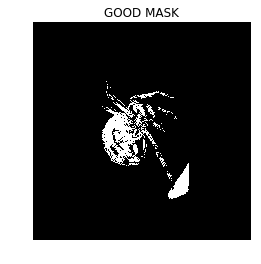

In [49]:
# GOOD MASK
import cv2
import numpy as np
img = cv2.imread('T-20170621-152227.png',0)
ret,thresh_img = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
axis("off")
title("GOOD MASK")
imshow(thresh_img, cmap = 'gray')
show()

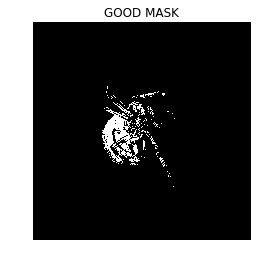

In [37]:
# GOOD MASK
import cv2
import numpy as np
img = cv2.imread('T-20170621-152227.png',0)
ret,thresh_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
axis("off")
title("GOOD MASK")
imshow(thresh_img, cmap = 'gray')
show()

In [ ]:
http://www.scipy-lectures.org/advanced/image_processing/

In [5]:
# GOOD MASKimport cv2
from PIL import Image
import cv2
import numpy as np
from skimage import io
img = cv2.imread('T-20170621-152227.png',0)
ret,thresh_img = cv2.threshold(img,107,255,cv2.THRESH_BINARY)
axis("off")
title("GOOD MASK")
#This is a good mask
imshow(thresh_img, cmap = 'gray')
#show()
#img = cv2.imread('T-20170621-152227.png')
#mask = cv2.imread('mask.png',0)
#res = cv2.bitwise_and(img, img, mask)
#mask.save('image_out2.png')

cv2.imwrite('image_out3.png', thresh_img)

#save cv2.imwrite('image_out2.png', imshow(thresh_img))

img = io.imread("T-20170621-152227.png")
mask = io.imread("image_out.png")
mask2 = np.where((mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
#io.imshow(img)
#io.show()

# import scipy.misc
# scipy.misc.imsave('outfile.jpg', img)

cv2.imwrite('sample_out_2.png', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))    

image_in ='sample_out_2.png'
image_out = 'trans-back-sample_out_2.png'
 
src = cv2.imread(image_in, 1)
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(src)
rgba = [b,g,r, alpha]
dst = cv2.merge(rgba,4)
cv2.imwrite(image_out, dst)
io.imshow(image_out)
io.show()

NameError: name 'axis' is not defined

# http://www.programcreek.com/python/

In [ ]:
http://www.programcreek.com/python/

Size:  1228800
Shape:  (640, 640, 3)


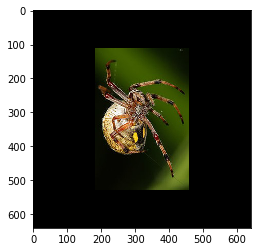

In [20]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread, imsave

image_data = imread('T-20170621-152227.png').astype(np.float32)
print 'Size: ', image_data.size
print 'Shape: ', image_data.shape

scaled_image_data = image_data / 255.

# Save the modified image if you want to
# imsave('test_out.png', scaled_image_data)

plt.imshow(scaled_image_data)
plt.show()

#scaled_image_data.Image.save('foo.png', bbox_inches='tight')

## building-powerful-image-classification-models
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
https://gist.github.com/fchollet/7eb39b44eb9e16e59632d25fb3119975
https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3



https://auth0.com/blog/image-processing-in-python-with-pillow/


https://stackoverflow.com/questions/34691128/how-to-use-mask-to-remove-the-background-in-python

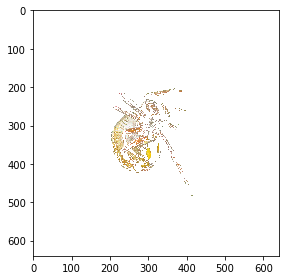

In [51]:
#WORKS DO NOT CHANGE  need to adjust threshholds
from Gtool import datename
from skimage import io
import numpy as np
import cv2
img = io.imread("T-20170621-152227.png")
mask = io.imread("image_out.png")
mask2 = np.where((mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
#io.imshow(img)
#io.show()

# import scipy.misc
# scipy.misc.imsave('outfile.jpg', img)

cv2.imwrite('sample_out_2.png', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))    

image_in ='sample_out_2.png'
image_out = 'trans-back-sample_out_2.png'
 
src = cv2.imread(image_in, 1)
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(src)
rgba = [b,g,r, alpha]
dst = cv2.merge(rgba,4)
cv2.imwrite(image_out, dst)
io.imshow(image_out)
io.show()

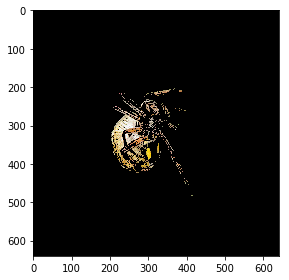

True

In [44]:
#WORKS DONOT CHANGE 
from Gtool import datename
from skimage import io
import numpy as np
import cv2
img = io.imread("T-20170621-152227.png")
mask = io.imread("image_out.png")
mask2 = np.where((mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
io.imshow(img)
io.show()

# import scipy.misc
# scipy.misc.imsave('outfile.jpg', img)

cv2.imwrite('sample_out_2.png', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

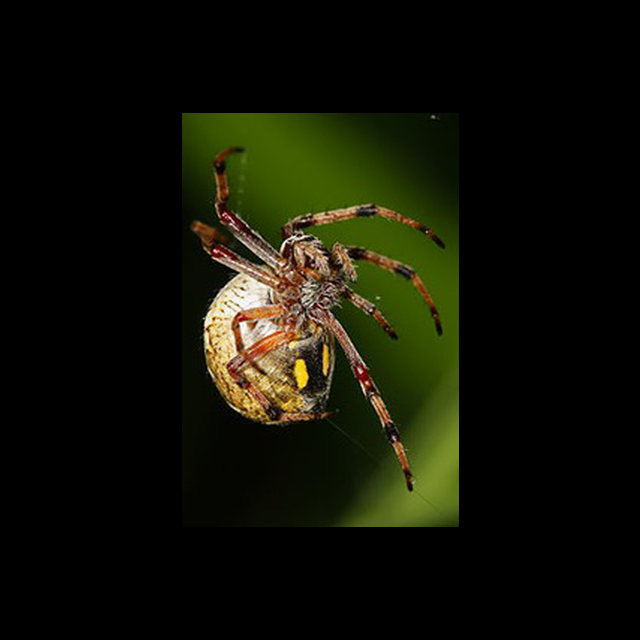

In [40]:
import numpy as np
from PIL import Image
import cv2
img = Image.open('T-20170621-152227.png')
mask = Image.open('image_out.png')
#height,width,depth = img.shape
IMG = Image.composite(img, img, mask)
IMG

In [ ]:
import scipy
import numpy
mat= scipy.misc.imread('T-20170621-152227.png', flatten=False, mode=None)

mat.dump("my_matrix.dat")
mat2 = numpy.load("my_matrix.dat")

In [ ]:
from binascii import a2b_base64

data = 'MY BASE64-ENCODED STRING'
binary_data = a2b_base64(data)

fd = open('image.png', 'wb')
fd.write(binary_data)
fd.close()

In [182]:
img = cv2.imread('T-20170621-152227.png')
mask = cv2.imread('mask.png',0)
res = cv2.bitwise_and(img,img,mask = mask)

In [21]:
#%%writefile rmwhite.py
#!/usr/bin/python
# Works Great makes black transparent
import cv2 
image_in ="nw-20170622-063759.png"
image_out = "Nnw-20170622-063759.png"
 
src = cv2.imread(image_in, 1)
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(src)
rgba = [b,g,r, alpha]
dst = cv2.merge(rgba,4)
cv2.imwrite(image_out, dst)

True

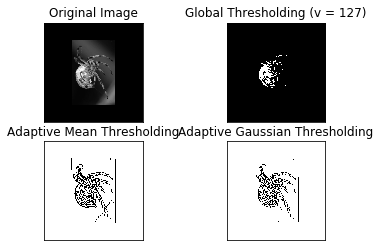

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('T-20170621-152227.png',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

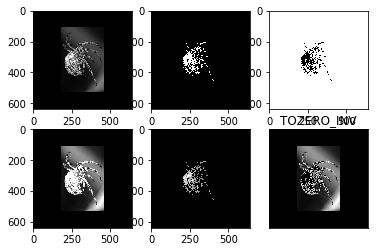

In [35]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
img = cv2.imread('T-20170621-152227.png',0) 
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) 
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) 
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC) 
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO) 
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV) 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV'] 
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5] 
for i in xrange(6): plt.subplot(2,3,i+1),plt.imshow(images[i],'gray') 
plt.title(titles[i]) 
plt.xticks([]),plt.yticks([]) 
plt.show()

Populating the interactive namespace from numpy and matplotlib


/home/jack/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread', 'imsave']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


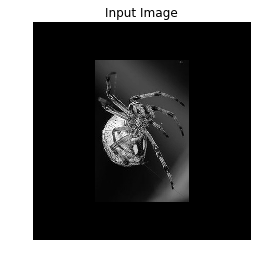

In [34]:
%pylab inline 
import cv2 
#Read the input image First of all read the image, then convert the image to grayscale 
#and finally display the image. 
im = imread("T-20170621-152227.png") 
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) 
axis("off") 
title("Input Image") 
imshow(im_gray, cmap = 'gray') 
show()

In [107]:
from PIL import Image
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
img = cv2.imread('T-20170621-152227.png',0) 
thres = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(thres,'gray') 

#xxx.save("gdgdg.png")

ValueError: setting an array element with a sequence.

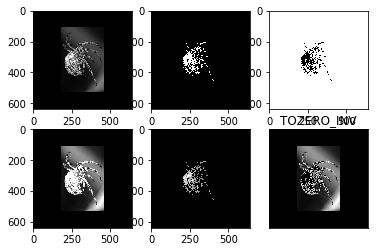

In [99]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
img = cv2.imread('T-20170621-152227.png',0) 
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) 
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) 
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC) 
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO) 
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV) 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV'] 
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5] 
for i in xrange(6): plt.subplot(2,3,i+1),plt.imshow(images[i],'gray') 
plt.title(titles[i]) 
plt.xticks([]),plt.yticks([]) 
plt.show()

In [124]:
!pip install webcolors

TypeError: __import__() takes at most 4 arguments (5 given)

In [161]:
from PIL import ImageChops
from PIL import Image
im = Image.open('tmpx.png')
border = 120
def trim(im, border):
    bg = Image.new(im.mode, im.size, border)
    diff = ImageChops.difference(im, bg)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)
    else:
         # found no content
        raise ValueError("cannot trim; image was empty")
            
            
im.save('T-20170621-152227.png', 'PNG')

In [138]:
from PIL import Image
image = Image.open('20170621-153613.png')
bg = image.getpixel((0,0))
width, height = image.size
bg_count = next(n for n,c in image.getcolors(width*height) if c==bg)
img_count = width*height - bg_count
img_percent = img_count*100.0/width/height

print ("percent"+img_percent)

TypeError: cannot concatenate 'str' and 'float' objects

In [128]:
from PIL import Image
import sys
sys.path.insert(1,"/home/jack/anaconda2/lib/python2.7/site-packages")
import webcolors

def closest_color(requested_color):
    min_colors = {}
    for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_color[0]) ** 2
        gd = (g_c - requested_color[1]) ** 2
        bd = (b_c - requested_color[2]) ** 2
        min_colors[(rd + gd + bd)] = name
    return min_colors[min(min_colors.keys())]

def get_color_name(requested_color):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_color)
    except ValueError:
        closest_name = closest_color(requested_color)
        actual_name = None
    return actual_name, closest_name

if __name__ == '__main__':
    lt = Image.open('20170621-180213.png').convert('RGB').getcolors()
    lt.sorted(key=lambda tup:tup[0], reverse=True)
    actual_name, closest_name = get_color_name(lt[0][4])
    print lt[0], actual_name, closest_name

AttributeError: 'NoneType' object has no attribute 'sorted'

In [164]:
#%%writefile rmblack.py
#!/usr/bin/python
def rm_black(image_in ="T-20170621-152227.png", image_out = "n-20170621-152227.png"):
    import cv2    
    src = cv2.imread(image_in, 1)
    tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    _,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
    b, g, r = cv2.split(src)
    rgba = [b,g,r, alpha]
    dst = cv2.merge(rgba,4)
    cv2.imwrite(image_out, dst)
    return dst
    rm_black(image_in ="T-20170621-152227.png", image_out = "n-20170621-152227.png")

In [100]:
#needs lot ofwork
from PIL import Image

img = Image.open('20170622-063759.png')
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save("nw-20170622-063759.png", "PNG")

In [114]:
!ls /usr/include/GraphicsMagick/wand/

drawing_wand.h	magick_wand.h  pixel_wand.h  wand_api.h  wand_symbols.h


In [118]:
import pychecker.checker
http://pychecker.sourceforge.net/

In [115]:
!pip install wand

  Using cached Wand-0.4.4-py2-none-any.whl


In [117]:
from wand.image import Image
from wand.color import Color

with Image(filename="20170622-063759.png") as img:
    img.format = 'png'
    with Color('#FDFDFD') as white:
        twenty_percent = int(65535 * 0.2)  # Note: percent must be calculated from Quantum
        img.transparent_color(white, alpha=0.0, fuzz=twenty_percent)
    img.save(filename="wand-20170622-063759.png")

In [109]:
#okay but not great
from PIL import Image
import numpy as np
FNAME = '20170622-063759.png'
threshold=200
dist=8
img=Image.open(FNAME).convert('RGBA')
# np.asarray(img) is read only. Wrap it in np.array to make it modifiable.
arr=np.array(np.asarray(img))
r,g,b,a=np.rollaxis(arr,axis=-1)    
mask=((r>threshold)
      & (g>threshold)
      & (b>threshold)
      & (np.abs(r-g)<dist)
      & (np.abs(r-b)<dist)
      & (np.abs(g-b)<dist)
      )
arr[mask,3]=0
img=Image.fromarray(arr,mode='RGBA')
img.save('btrb-20170622-063759.png')

In [97]:
!ls *.py

app.py		 pyramid.py	     rmblack.py       test.py
collagemaker.py  rand_set_size.py    squarethumbs.py
helpers.py	 rand_set_square.py  tensor-graph.py


In [98]:
!python rmblack.py

In [89]:
import cv2
rmblack.rm_black("20170622-071317.png", "XCXCXC.png")

NameError: global name 'cv2' is not defined

In [48]:
# GREAT DO NOT TOUCH
from PIL import Image
from Gtool import randim
from Gtool import datename
import cv2
#make_square(imp_path='images/', side=300)
newim3 = randim.rand_im("bugs/spiders/")
newim3.save("tmpx.png")


tmpx = "tmpx.png"
src = cv2.imread(tmpx, 1)
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_,alpha = cv2.threshold(tmp,0,255,cv2.THRESH_BINARY)
b, g, r = cv2.split(src)
rgba = [b,g,r, alpha]
dst = cv2.merge(rgba,4)
cv2.imwrite(datename.date_name(), dst)

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ..., 
       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ..., 
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

# Using Gtool Functions  WORKING  ----end

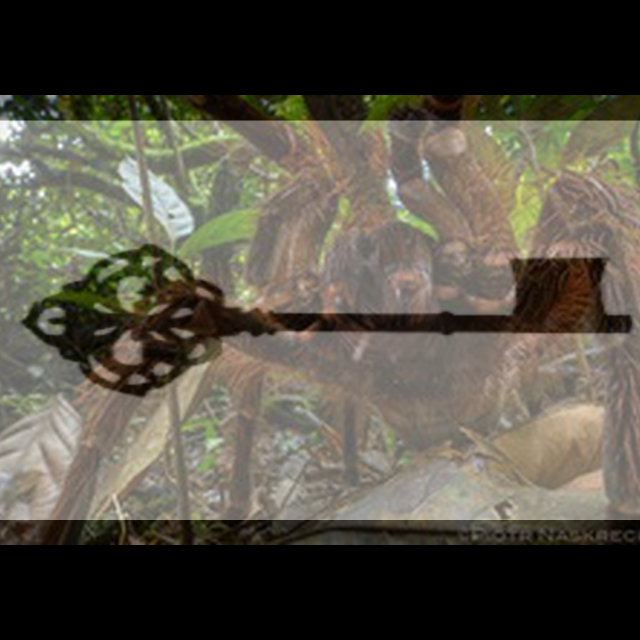

In [43]:
import Gtool
from Gtool import blendoverlay
blend_overlay(Opath="bugs/spiders/", Bpath="bugs/keys/")

In [63]:
from Gtool import blend_overlay
from Gtool import date_name
print (datename())

20170621-180245.png


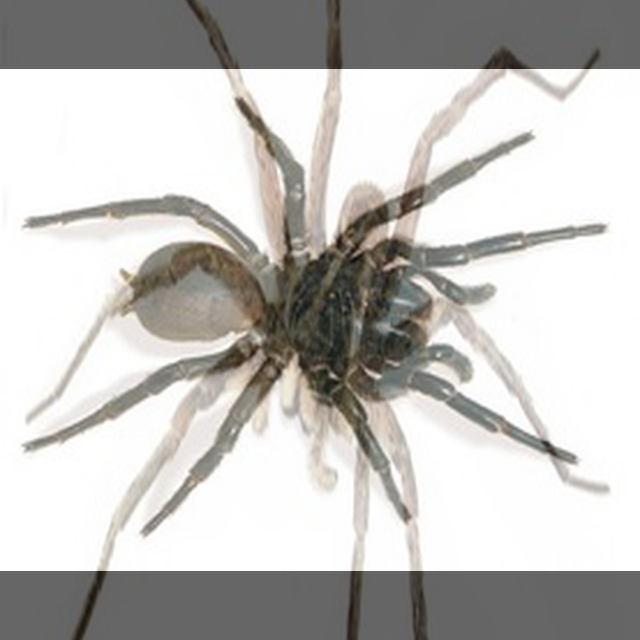

In [17]:
from Gtool import blend_overlay
from Gtool import date_name
new_img = blendoverlay("bugs/spiders/","bugs/spiders/")

new_img.save(date_name.datename(),"PNG")


new_img

In [46]:
from PIL import Image
background = Image.open("STUFF/"+"TEMP-img4.png").convert("RGBA")
overlay = Image.open("STUFF/"+"TEMP-img4a.png").convert("RGBA")

overlay.size

(640, 640)

In [47]:
from PIL import Image
background = Image.open("STUFF/"+"TEMP-img4.png").convert("RGBA")
overlay = Image.open("STUFF/"+"TEMP-img4a.png").convert("RGBA")

background.size

(1572, 2144)

In [39]:
#%%writefile /home/jack/anaconda2/pkgs/Gtool/blendoverlay.py
# ________  EXPERIMENT

"""
This opens two random images from the associated directory. Both images are resized to 640x640.
In order to use the blend function both images must be the same size. The first image has a randomly 
created transparent regions, to add to the effects. The blend is also a randon alpha so all
images created do not have an identical blend. All files saved are 640x640 and saved by
" date-filename.png "
"""
import PIL
import time
from PIL import Image
import random, os
from random import randint
import random, os
# Randomly choose two images. The default directories are images/. Theimages may be two 
# different directories.
def blend_overlay(Opath="images/", Bpath="images/"):
    #path = r"bugs/advertisements/"

    random_filename1 = random.choice([
        x for x in os.listdir(Opath)
        if os.path.isfile(os.path.join(Opath, x))
    ])

    img1 = Opath+random_filename1
    #img1 = "images/"+random_filename1
    im1 = Image.open(img1)
    longer_side = max(im1.size)
    basewidth = longer_side
    img = Image.open(img1)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
    half_the_width = img.size[0] / 2
    half_the_height = img.size[1] / 2
    img4 = img.crop(
        (
            half_the_width - 320,
            half_the_height - 320,
            half_the_width + 320,
            half_the_height + 320
        )
    )
    img4.save("STUFF/"+"TEMP-img5.png")
    from PIL import ImageDraw
    im = Image.open("STUFF/"+"TEMP-img5.png")

    x1=(randint(1, 150))
    x2=(randint(1, 150))
    y1=(randint(151,320))
    y2=(randint(151, 320))
    transparent_area = (x1,x2,300,500)

    mask=Image.new('L', im.size, color=255)
    draw=ImageDraw.Draw(mask) 
    draw.rectangle(transparent_area, fill=0)
    im.putalpha(mask)
    im.save("STUFF/"+"TEMP-img4.png")
    #path2 = r"bugs/butterflies/"
    #path2 = r"bugs/advertisements1800/"
    random_filename2 = random.choice([
        y for y in os.listdir(Bpath)
        if os.path.isfile(os.path.join(Bpath, y))
    ])

    img1a = Bpath+"/"+random_filename2
    im1a=Image.open(img1a)
    basewidth = 640
    imga = Image.open(img1a)
    wpercent = (basewidth / float(imga.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    imga = imga.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
    half_the_width = imga.size[0] / 2
    half_the_height = imga.size[1] / 2
    img4a = imga.crop(
        (
            half_the_width - 320,
            half_the_height - 320,
            half_the_width + 320,
            half_the_height + 320
        )
    )
    img4a.save("STUFF/"+"TEMP-img4a.png")
    img1 = "STUFF/"+"TEMP-img4.png"
    img2 = "STUFF/"+"TEMP-img4a.png"

    from PIL import Image
    #im1=Image.open(img1)
    #im1.size # (width,height) tuple
    #im2=Image.open(img2)
    #im2.size # (width,height) tuple
    background = Image.open(img1)
    overlay = Image.open(img2)

    #background = Image.open(img2)
    background = background.convert("RGBA")
    #overlay = Image.open(img2)
    overlay = overlay.convert("RGBA")
    Alpha=(randint(1, 9))*0.1
    new_img = Image.blend(background, overlay, Alpha)

    timename = time.strftime("%Y%m%d-%H%M%S")
    #filename = timename+".png"
    filename = timename
    new_img.save("XXXXXXXXXXX"+filename,"PNG")
    return new_img

Overwriting /home/jack/anaconda2/pkgs/Immanip/blend_overlay.py


In [16]:
#from PIL import Image
from Gtool import blend_overlay
blendoverlay()
#new_img.save("cycle/"+datetime(),"PNG")

UnboundLocalError: local variable 'Image' referenced before assignment

In [ ]:
# ________  EXPERIMENT

"""
This opens two random images from the associated directory. Both images are resized to 640x640.
In order to use the blend function both images must be the same size. The first image has a randomly 
created transparent regions, to add to the effects. The blend is also a randon alpha so all
images created do not have an identical blend. All files saved are 640x640 and saved by
" date-filename.png "
"""
import PIL
import time
from PIL import Image
import random, os
from random import randint
path = r"bugs/advertisements/"
import random, os
random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])

img1 = path+"/"+random_filename
im1=Image.open(img1)
longer_side = max(im1.size)
basewidth = longer_side
img = Image.open(img1)
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
half_the_width = img.size[0] / 2
half_the_height = img.size[1] / 2
img4 = img.crop(
    (
        half_the_width - 320,
        half_the_height - 320,
        half_the_width + 320,
        half_the_height + 320
    )
)
img4.save("STUFF/"+"TEMP-img5.png")
from PIL import ImageDraw
im = Image.open("STUFF/"+"TEMP-img5.png")

x1=(randint(1, 150))
x2=(randint(1, 150))
y1=(randint(151,320))
y2=(randint(151, 320))
transparent_area = (x1,x2,300,500)

mask=Image.new('L', im.size, color=255)
draw=ImageDraw.Draw(mask) 
draw.rectangle(transparent_area, fill=0)
im.putalpha(mask)
im.save("STUFF/"+"TEMP-img4.png")
path2 = r"bugs/butterflies/"
#path2 = r"bugs/advertisements1800/"
random_filename2 = random.choice([
    y for y in os.listdir(path2)
    if os.path.isfile(os.path.join(path2, y))
])

img1a = path2+"/"+random_filename2
im1a=Image.open(img1a)
basewidth = 640
imga = Image.open(img1a)
wpercent = (basewidth / float(imga.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
imga = imga.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
half_the_width = imga.size[0] / 2
half_the_height = imga.size[1] / 2
img4a = imga.crop(
    (
        half_the_width - 320,
        half_the_height - 320,
        half_the_width + 320,
        half_the_height + 320
    )
)
img4a.save("STUFF/"+"TEMP-img4a.png")
img1 = "STUFF/"+"TEMP-img4.png"
img2 = "STUFF/"+"TEMP-img4a.png"

from PIL import Image
#im1=Image.open(img1)
#im1.size # (width,height) tuple
#im2=Image.open(img2)
#im2.size # (width,height) tuple
background = Image.open(img1)
overlay = Image.open(img2)

#background = Image.open(img2)
background = background.convert("RGBA")
#overlay = Image.open(img2)
overlay = overlay.convert("RGBA")
Alpha=(randint(1, 9))*0.1
new_img = Image.blend(background, overlay, Alpha)

timename = time.strftime("%Y%m%d-%H%M%S")
#filename = timename+".png"
filename = timename
#new_img.save(filename,"PNG")

new_img.save("cycle/"+filename+".png","PNG")

In [ ]:
# %load /home/jack/opencv-bak/samples/python/grabcut.py
#!/usr/bin/env python
'''
===============================================================================
Interactive Image Segmentation using GrabCut algorithm.

This sample shows interactive image segmentation using grabcut algorithm.

USAGE:
    python grabcut.py <filename>

README FIRST:
    Two windows will show up, one for input and one for output.

    At first, in input window, draw a rectangle around the object using
mouse right button. Then press 'n' to segment the object (once or a few times)
For any finer touch-ups, you can press any of the keys below and draw lines on
the areas you want. Then again press 'n' for updating the output.

Key '0' - To select areas of sure background
Key '1' - To select areas of sure foreground
Key '2' - To select areas of probable background
Key '3' - To select areas of probable foreground

Key 'n' - To update the segmentation
Key 'r' - To reset the setup
Key 's' - To save the results
===============================================================================
'''

# Python 2/3 compatibility
from __future__ import print_function

import numpy as np
import cv2
import sys

BLUE = [255,0,0]        # rectangle color
RED = [0,0,255]         # PR BG
GREEN = [0,255,0]       # PR FG
BLACK = [0,0,0]         # sure BG
WHITE = [255,255,255]   # sure FG

DRAW_BG = {'color' : BLACK, 'val' : 0}
DRAW_FG = {'color' : WHITE, 'val' : 1}
DRAW_PR_FG = {'color' : GREEN, 'val' : 3}
DRAW_PR_BG = {'color' : RED, 'val' : 2}

# setting up flags
rect = (0,0,1,1)
drawing = False         # flag for drawing curves
rectangle = False       # flag for drawing rect
rect_over = False       # flag to check if rect drawn
rect_or_mask = 100      # flag for selecting rect or mask mode
value = DRAW_FG         # drawing initialized to FG
thickness = 3           # brush thickness

def onmouse(event,x,y,flags,param):
    global img,img2,drawing,value,mask,rectangle,rect,rect_or_mask,ix,iy,rect_over

    # Draw Rectangle
    if event == cv2.EVENT_RBUTTONDOWN:
        rectangle = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if rectangle == True:
            img = img2.copy()
            cv2.rectangle(img,(ix,iy),(x,y),BLUE,2)
            rect = (min(ix,x),min(iy,y),abs(ix-x),abs(iy-y))
            rect_or_mask = 0

    elif event == cv2.EVENT_RBUTTONUP:
        rectangle = False
        rect_over = True
        cv2.rectangle(img,(ix,iy),(x,y),BLUE,2)
        rect = (min(ix,x),min(iy,y),abs(ix-x),abs(iy-y))
        rect_or_mask = 0
        print(" Now press the key 'n' a few times until no further change \n")

    # draw touchup curves

    if event == cv2.EVENT_LBUTTONDOWN:
        if rect_over == False:
            print("first draw rectangle \n")
        else:
            drawing = True
            cv2.circle(img,(x,y),thickness,value['color'],-1)
            cv2.circle(mask,(x,y),thickness,value['val'],-1)

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.circle(img,(x,y),thickness,value['color'],-1)
            cv2.circle(mask,(x,y),thickness,value['val'],-1)

    elif event == cv2.EVENT_LBUTTONUP:
        if drawing == True:
            drawing = False
            cv2.circle(img,(x,y),thickness,value['color'],-1)
            cv2.circle(mask,(x,y),thickness,value['val'],-1)

if __name__ == '__main__':

    # print documentation
    print(__doc__)

    # Loading images
    if len(sys.argv) == 2:
        filename = sys.argv[1] # for drawing purposes
    else:
        print("No input image given, so loading default image, ../data/lena.jpg \n")
        print("Correct Usage: python grabcut.py <filename> \n")
        filename = '../data/lena.jpg'

    img = cv2.imread(filename)
    img2 = img.copy()                               # a copy of original image
    mask = np.zeros(img.shape[:2],dtype = np.uint8) # mask initialized to PR_BG
    output = np.zeros(img.shape,np.uint8)           # output image to be shown

    # input and output windows
    cv2.namedWindow('output')
    cv2.namedWindow('input')
    cv2.setMouseCallback('input',onmouse)
    cv2.moveWindow('input',img.shape[1]+10,90)

    print(" Instructions: \n")
    print(" Draw a rectangle around the object using right mouse button \n")

    while(1):

        cv2.imshow('output',output)
        cv2.imshow('input',img)
        k = cv2.waitKey(1)

        # key bindings
        if k == 27:         # esc to exit
            break
        elif k == ord('0'): # BG drawing
            print(" mark background regions with left mouse button \n")
            value = DRAW_BG
        elif k == ord('1'): # FG drawing
            print(" mark foreground regions with left mouse button \n")
            value = DRAW_FG
        elif k == ord('2'): # PR_BG drawing
            value = DRAW_PR_BG
        elif k == ord('3'): # PR_FG drawing
            value = DRAW_PR_FG
        elif k == ord('s'): # save image
            bar = np.zeros((img.shape[0],5,3),np.uint8)
            res = np.hstack((img2,bar,img,bar,output))
            cv2.imwrite('grabcut_output.png',res)
            print(" Result saved as image \n")
        elif k == ord('r'): # reset everything
            print("resetting \n")
            rect = (0,0,1,1)
            drawing = False
            rectangle = False
            rect_or_mask = 100
            rect_over = False
            value = DRAW_FG
            img = img2.copy()
            mask = np.zeros(img.shape[:2],dtype = np.uint8) # mask initialized to PR_BG
            output = np.zeros(img.shape,np.uint8)           # output image to be shown
        elif k == ord('n'): # segment the image
            print(""" For finer touchups, mark foreground and background after pressing keys 0-3
            and again press 'n' \n""")
            if (rect_or_mask == 0):         # grabcut with rect
                bgdmodel = np.zeros((1,65),np.float64)
                fgdmodel = np.zeros((1,65),np.float64)
                cv2.grabCut(img2,mask,rect,bgdmodel,fgdmodel,1,cv2.GC_INIT_WITH_RECT)
                rect_or_mask = 1
            elif rect_or_mask == 1:         # grabcut with mask
                bgdmodel = np.zeros((1,65),np.float64)
                fgdmodel = np.zeros((1,65),np.float64)
                cv2.grabCut(img2,mask,rect,bgdmodel,fgdmodel,1,cv2.GC_INIT_WITH_MASK)

        mask2 = np.where((mask==1) + (mask==3),255,0).astype('uint8')
        output = cv2.bitwise_and(img2,img2,mask=mask2)

    cv2.destroyAllWindows()

In [42]:
import PIL
from PIL import ImageDraw
from PIL import Image
import random, os
from random import randint
import random, os
path = r"bugs/advertisements/"
random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
img1 = path+"/"+random_filename
im=Image.open(img1)

x1=(randint(1, 150))
x2=(randint(1, 150))
y1=(randint(151,320))
y2=(randint(151, 320))
transparent_area = (x1,x2,300,500)

mask=Image.new('L', im.size, color=255)
draw=ImageDraw.Draw(mask) 
draw.rectangle(transparent_area, fill=0)
im.putalpha(mask)
im.save("STUFF/"+"TEMP-img4.png")
path2 = r"bugs/butterflies/"
#path2 = r"bugs/advertisements1800/"
random_filename2 = random.choice([
    y for y in os.listdir(path2)
    if os.path.isfile(os.path.join(path2, y))
])

img1a = path2+"/"+random_filename2
im1a=Image.open(img1a)
basewidth = 640
imga = Image.open(img1a)
wpercent = (basewidth / float(imga.size[0]))
hsize = int((float(imga.size[1]) * float(wpercent)))
imga = imga.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
half_the_width = imga.size[0] / 2
half_the_height = imga.size[1] / 2
img4a = imga.crop(
    (
        half_the_width - 320,
        half_the_height - 320,
        half_the_width + 320,
        half_the_height + 320
    )
)
img4a.save("TEMP-img4a.png")

In [ ]:
from PIL import ImageDraw
from PIL import Image
import time
im = Image.open("STUFF/"+"TEMP-img5.png")

x1=(randint(1, 150))
x2=(randint(1, 150))
y1=(randint(151,320))
y2=(randint(151, 320))
transparent_area = (x1,x2,300,500)

mask=Image.new('L', im.size, color=255)
draw=ImageDraw.Draw(mask) 
draw.rectangle(transparent_area, fill=0)
im.putalpha(mask)
im.save("STUFF/"+"TEMP-img4.png")
path2 = r"bugs/butterflies/"
#path2 = r"bugs/advertisements1800/"
random_filename2 = random.choice([
    y for y in os.listdir(path2)
    if os.path.isfile(os.path.join(path2, y))
])

img1a = path2+"/"+random_filename2
im1a=Image.open(img1a)
basewidth = 640
imga = Image.open(img1a)
wpercent = (basewidth / float(imga.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
imga = imga.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
half_the_width = imga.size[0] / 2
half_the_height = imga.size[1] / 2
img4a = imga.crop(
    (
        half_the_width - 320,
        half_the_height - 320,
        half_the_width + 320,
        half_the_height + 320
    )
)
#img4a.save("STUFF/"+"TEMP-img4a.png")


timename = time.strftime("%Y%m%d-%H%M%S")
filename = timename


img4a.save("STUFF/"+filename+".png","PNG")

In [ ]:
%%writefile /home/jack/anaconda2/pkgs/Gtool/randsize.py
#!/usr/bin/python
import PIL
import time
from PIL import Image
import random, os
from random import randint

def randop(inpath):
    path = inpath
    random_filename = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
    ])

    img1 = path+"/"+random_filename
    im1=Image.open(img1)
    longer_side = max(im1.size)
    basewidth = longer_side
    img = Image.open(img1)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
    half_the_width = img.size[0] / 2
    half_the_height = img.size[1] / 2
    img4 = img.crop(
        (
            half_the_width - 320,
            half_the_height - 320,
            half_the_width + 320,
            half_the_height + 320
        )
    )
    img4.save(outpath+"TEMP-Gtool.png")
    
    return img4

# SAVE ALL BELOW AS BACKUP

In [ ]:
%%writefile /home/jack/anaconda2/pkgs/Gtool/randop.py
#!/usr/bin/python
import PIL
import time
from PIL import Image
import random, os
from random import randint

def randop(inpath):
    path = inpath
    random_filename = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
    ])

    img1 = path+"/"+random_filename
    im1=Image.open(img1)
    longer_side = max(im1.size)
    basewidth = longer_side
    img = Image.open(img1)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
    half_the_width = img.size[0] / 2
    half_the_height = img.size[1] / 2
    img4 = img.crop(
        (
            half_the_width - 320,
            half_the_height - 320,
            half_the_width + 320,
            half_the_height + 320
        )
    )
    img4.save(outpath+"TEMP-Gtool.png")
    
    return img4

In [ ]:
import Gtool
img4 = randop("bugs/childrens-books")
img4.save("STUFF/"+"TEMP-Gtool.png")

In [ ]:
%%writefile /home/jack/anaconda2/pkgs/Gtool/centercrop.py
#!/usr/bin/python
import PIL
import time
from PIL import Image
import random, os
from random import randint
import randop

def center_crop(inpath):
    import PIL
    import time
    from PIL import Image
    import random, os
    from random import randint
    path = inpath
    random_filename = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
    ])

    img1 = path+"/"+random_filename
    im1=Image.open(img1)
    longer_side = max(im1.size)
    basewidth = longer_side
    img = Image.open(img1)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
    half_the_width = img.size[0] / 2
    half_the_height = img.size[1] / 2
    img4 = img.crop(
        (
            half_the_width - 320,
            half_the_height - 320,
            half_the_width + 320,
            half_the_height + 320
        )
    )
    return img4

In [ ]:
#%%writefile /home/jack/anaconda2/pkgs/Gtool/Gtool_square.py
#!/usr/bin/python
import PIL
import time
from PIL import Image
import random, os
from random import randint
import random, os
def Gtool_square(imp_path, side):
    path = imp_path
    #path = "bugs/advertisements/"
    random_filename = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
    ])
    img1 = path+"/"+random_filename
    im1=Image.open(img1)
    img = im1.resize((side,side), PIL.Image.ANTIALIAS)
    return img

In [ ]:
import Gtool
img = Gtool_square("bugs/advertisements/",200)
img.save('STUFF/sompicSSS.jpg') 
img

In [44]:
#%%writefile /home/jack/anaconda2/pkgs/Gtool/Gtool.py
#!/usr/bin/python
import PIL
import time
from PIL import Image
import random, os
from random import randint
# randim(inpath = "images/") Finds random images in a directory - Default directory is images/
def rand_im(inpath = "images/"):
    path = inpath
    random_filename = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
    ])

    img1 = path+"/"+random_filename
    im1=Image.open(img1)
    longer_side = max(im1.size)
    basewidth = longer_side
    img = Image.open(img1)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
    half_the_width = img.size[0] / 2
    half_the_height = img.size[1] / 2
    img4 = img.crop(
        (
            half_the_width - 320,
            half_the_height - 320,
            half_the_width + 320,
            half_the_height + 320
        )
    )
    return img4

# make_square(imp_path = "images/", side=300) Picks a ranom image in a directory, squares it \
# reguardless of aspect. The default directory is images/ the default size is 300
# usage for default directory and size just use: make_square()
# Foryou own directory or size: make_square(imp_path = "My-directory/", side=500)
def make_square(imp_path = "images/", side=300):
    random_filename = random.choice([
        x for x in os.listdir(imp_path)
        if os.path.isfile(os.path.join(imp_path, x))
    ])
    img2 = imp_path+"/"+random_filename
    im2=Image.open(img2)
    img5 = im2.resize((side,side), PIL.Image.ANTIALIAS)
    return img5

# rand_size(imp_path='STUFF/new/', minS=150, maxS=300, output="STUFF/Temp.jpg")
# Picks a ranom image in a directory, and distorts it  
# Default path images/ default minimum width random(250-400), height random(250-400) intentionally\
# distorting the aspect.
def rand_size(imp_path='images/', minS=250, maxS=500, output="STUFF/Temp.jpg"):
    path3 = imp_path
    random_filename3 = random.choice([
        x for x in os.listdir(path3)
        if os.path.isfile(os.path.join(path3, x))
    ])
    sidea=(randint(minS, maxS))
    
    sideb=(randint(minS, maxS))
    img1 = path3+"/"+random_filename3
    im1=Image.open(img1)
    img = im1.resize((sidea,sideb), PIL.Image.ANTIALIAS)
    img.save(output)
    return img

In [ ]:
if __name__ == '__main__':

In [111]:
%pylab inline
import cv2

Populating the interactive namespace from numpy and matplotlib


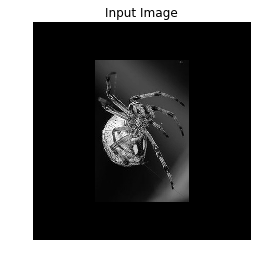

In [42]:
im = imread("T-20170621-152227.png")
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
axis("off")
title("Input Image")
imshow(im_gray, cmap = 'gray')
show()

/home/jack/anaconda2/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


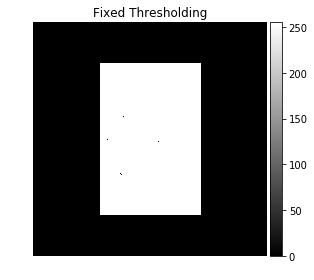

In [41]:
from skimage import io
im = imread("T-20170621-152227.png")
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
retval, im_at_fixed = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY)
axis("off")
title("Fixed Thresholding")
io.imshow(im_at_fixed, cmap = 'gray')
io.show()

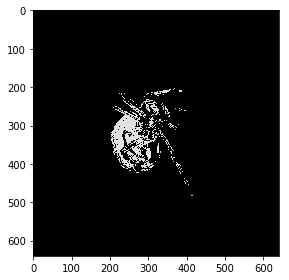

In [30]:
# GOOD MASK
from skimage import io
import cv2
import numpy as np
img = cv2.imread('T-20170621-152227.png',0)
#ret,thresh_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh_img = cv2.threshold(img,127,225,cv2.THRESH_BINARY)
#axis("off")
#title("GOOD MASK")
io.imshow(thresh_img, cmap = 'gray')
io.show()

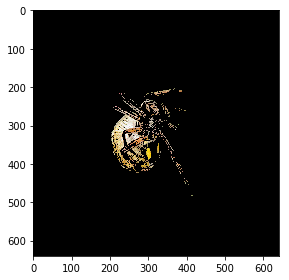

True

In [28]:
#WORKS DONOT CHANGE 
from Gtool import datename
from skimage import io
import numpy as np
import cv2
img = io.imread("T-20170621-152227.png")
mask = io.imread("image_out.png")
mask2 = np.where((mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
io.imshow(img)
io.show()

# import scipy.misc
# scipy.misc.imsave('outfile.jpg', img)

cv2.imwrite('sample_out_2.png', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

In [5]:
from Gtool import test_my_script
Gtool.test_my_script

In [4]:
from Gtool import test_my_script
help(test_my_script)

Help on module Gtool.test_my_script in Gtool:

NAME
    Gtool.test_my_script

FILE
    /home/jack/anaconda2/pkgs/Gtool/test_my_script.py

FUNCTIONS
    resize(path='/home/jack/Desktop/deep-dream-generator/notebooks/tmp/', height=200, width=200)




In [63]:
# Working but no use for me
# Standard imports
import cv2
import numpy as np;
 
# Read image
im = cv2.imread("randsize_XXX.png", cv2.IMREAD_GRAYSCALE)
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 50
params.maxThreshold = 250
# Filter by Area.
params.filterByArea = True
params.minArea = 150
detector = cv2.SimpleBlobDetector_create(params) 
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs.
keypoints = detector.detect(im)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (100,100,205), \
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)

255

In [79]:
from nodebox.graphics import *
def draw(canvas):
    canvas.clear()
    translate(250, 250)
    rotate(canvas.frame)
    rect(x=-50, y=-50, width=100, height=100)
canvas.size = 500, 500
canvas.run(draw)

#### http://www.cityinabottle.org/nodebox/
####   https://arxiv.org/pdf/1410.0281.pdf
####  http://support.nodebox.net/discussions/nodebox-1/2-matching-drawpath-to-cornupath-dimensions-using-cornufit

In [85]:
from nodebox.graphics import *
from nodebox.graphics.physics import Flock
  
flock = Flock(40, 0, 0, 500, 500)
flock.sight = 300
  
def draw(canvas):
    background(1)
    fill(0, 0.75)
    flock.update(cohesion=0.15)
    for boid in flock:
        push()
        translate(boid.x, boid.y)
        scale(0.5 + 1.5 * boid.depth)
        rotate(boid.heading)
        arrow(0, 0, 15)
        pop()
      
canvas.fps = 30
canvas.size = 600, 400
canvas.run(draw)

ArgumentError: argument 2: <type 'exceptions.TypeError'>: wrong type

In [80]:
# The following code and the code generated art works are the intellectrual properities of Hailei Wang.
# © 2009 - 2014, Hailei Wang. All rights reserved.

from nodebox import geo
colors = ximport("colors") 

# Define Brush
def composeimage( x, y, colr, radius, points, diminish ) : 
	nofill()
	stroke()
	strokewidth( 0.05 )
	autoclosepath( False )
	count = int( radius * 1.3 )
	colr = colors.color( colr )
	grad = colors.gradient( colr.darken( 1.0 ), colr, colr.lighten( 1.0 ).desaturate( 0.4 ), steps = count )
	for i in range( count ) :
		stroke( grad[ i ] )
		a = 0.75 - 0.25 * float( i ) / count
		colors.shadow( dx = 5, dy = 8, alpha = a, blur = 15 )
		path = oval( x - radius + i * 0.5, y - radius + i * 0.5, 
		radius * 2 - i, radius * 2 - i, draw = False )
		drawpath( brushpaint( path, points = int( points - i * 0.2 ), length = radius - i + random( count - i ) / 3, diminish = diminish ) )

# Hold and Draw w/Brush
def brushpaint( path, points = 100, length = 100, diminish = 700 ) :
	beginpath( 0, 0 )
	for ap in path.points( points ) :
		angle = geo.angle( ap.x, ap.y, ap.ctrl1.x, ap.ctrl1.y )
		dx,dy = geo.coordinates( ap.x, ap.y, length, angle + 90 )
		moveto( ap.x, ap.y )
		curveto( ap.x + random( -diminish, diminish ),  ap.y + random( -diminish, diminish ), dx + random( -diminish, diminish ), dy + random( -diminish, diminish ), dx, dy )
return endpath( draw = False )

ImportError: cannot import name geo

In [ ]:
https://www.nodebox.net/

In [82]:
from nodebox.graphics import *
  
def draw(canvas):
    canvas.clear()
    nofill()
    stroke(0, 0.25)
    strokewidth(1)
    rect( 50, 50, 50, 50)
    rect(110, 50, 50, 50, stroke=Color(0), strokestyle=DASHED)
    rect(170, 50, 50, 50)
      
canvas.run(draw)

ArgumentError: argument 2: <type 'exceptions.TypeError'>: wrong type

import pyttsx
from gtts import gTTS

??? not working

import festival

(SayText "Hello, How you doing Hun Hun")


from gtts import gTTS
import os
tts = gTTS(text='Good morning', lang='en')
tts.save("good.mp3")
os.system("mpg321 good.mp3")

import speech
speech.say('Hola mundo', 'es_ES')

import pyttsx
from gtts import gTTS

??? not working